In [1]:
# Import
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.enable_eager_execution()

1.13.1


In [2]:
# Load Data 
filename = 'C:\\Users\\deniz\\Desktop\\Thesis of ML for AutoPas\\Data\\Batch3\\b3e1-6.txt'
arr = np.genfromtxt(filename, delimiter=',')
print(arr.shape)

(878, 30)


In [3]:
# Define how many parameters you have (it is assumed that the rest are classes)
parameter_count = 7

In [4]:
# Copy the array
data = np.copy(arr)

# Shuffle data and take 80% as test data
np.random.shuffle(data)
test_size = (np.ceil(data.shape[0] * 4 / 5)).astype(int)
train_params = data[test_size:,0:parameter_count]
train_labels = np.argmin(data[test_size:,parameter_count:], 1).astype(int)
test_params = data[:test_size,0:parameter_count]
test_labels = np.argmin(data[:test_size,parameter_count:], 1).astype(int)


# Posible normalization functions
def normalize01(array):
    divisor = np.max(array)
    for i in range(array.size):
        array[i] = array[i] / divisor
        
def normalize02(array):
    divisor = np.max(array)
    sub = np.min(array)
    for i in range(array.size):
        array[i] = (array[i] - sub) / divisor
        
# Normalize the data
np.apply_along_axis(normalize02, 0, train_params)
np.apply_along_axis(normalize02, 0, test_params)
print(train_params[0])

[0.         0.         0.         1.         0.         0.01040191
 0.00351172]


In [5]:
# Check how the total data is distributed among the labels
dist = np.bincount(np.concatenate((train_labels, test_labels)))
print(dist)
print(np.argmax(dist))
print(np.max(dist) / data.shape[0])

[281   9  54   0  33   0   0  43   0   0   0   0   5   3   0   0   0   1
   0   0 409   0  40]
20
0.46583143507972663


In [6]:
# Model
model = keras.Sequential([
    #keras.layers.Dense(parameter_count, activation=tf.nn.relu, input_dim=7),
    keras.layers.Dense(parameter_count, activation=tf.nn.relu),
    keras.layers.Dense(arr.shape[1] - parameter_count, activation=tf.nn.softmax)
])

opt = keras.optimizers.Adam(lr=0.25)

model.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
print(arr.shape[1] - parameter_count)

23


In [8]:
# Fun
model.fit(train_params, train_labels , epochs=50)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/50
175/175 [==============================] - 0s 3ms/sample - loss: 2.0411 - acc: 0.3257
Epoch 2/50
175/175 [==============================] - 0s 74us/sample - loss: 1.3147 - acc: 0.6114
Epoch 3/50
175/175 [==============================] - 0s 80us/sample - loss: 1.2529 - acc: 0.6057
Epoch 4/50
175/175 [==============================] - 0s 86us/sample - loss: 1.1565 - acc: 0.6514
Epoch 5/50
175/175 [==============================] - 0s 80us/sample - loss: 1.0682 - acc: 0.6400
Epoch 6/50
175/175 [==============================] - 0s 80us/sample - loss: 0.9886 - acc: 0.6743
Epoch 7/50
175/175 [==============================] - 0s 74us/sample - loss: 0.9469 - acc: 0.6743
Epoch 8/50
175/175 [==============================] - 0s 86us/sample - loss: 0.9026 - acc: 0.6743
Epoch 9/50
175/175 [==============================] - 0s 80us/sample - loss: 0.8655 - acc: 0.7029
Epoch 10/50
175/175 [==========================

In [9]:
predictions = model.predict(test_params)
test_loss, test_acc = model.evaluate(test_params, test_labels)
print('Test accuracy:', test_acc)

703/703 [==============================] - 0s 199us/sample - loss: 0.8761 - acc: 0.7269
Test accuracy: 0.7268848


In [10]:
# Print prediction, result, and how certain the result is
best = np.argsort(predictions)
print(' Best  Guess1  Guess2  Certainty1      Certainty2')
for i in range(test_size):
    print(' ', test_labels[i], '\t', best[i][-1], '\t', best[i][-2], '\t', \
          "{:.2%}".format(predictions[i][best[i][-1]]), '\t', "{:.2%}".format(predictions[i][best[i][-2]]))

 Best  Guess1  Guess2  Certainty1      Certainty2
  20 	 20 	 0 	 94.08% 	 4.57%
  20 	 20 	 0 	 94.10% 	 4.42%
  0 	 0 	 22 	 91.65% 	 6.98%
  20 	 0 	 20 	 53.68% 	 39.91%
  20 	 20 	 0 	 93.97% 	 5.46%
  22 	 0 	 22 	 52.99% 	 28.98%
  20 	 20 	 0 	 94.72% 	 4.29%
  0 	 0 	 20 	 67.56% 	 32.30%
  20 	 0 	 20 	 85.46% 	 11.48%
  0 	 20 	 0 	 61.73% 	 38.02%
  0 	 0 	 20 	 87.12% 	 11.02%
  7 	 2 	 7 	 38.91% 	 31.31%
  0 	 0 	 22 	 80.92% 	 10.07%
  0 	 0 	 22 	 73.19% 	 16.73%
  0 	 0 	 20 	 88.32% 	 10.04%
  20 	 0 	 22 	 85.51% 	 13.07%
  20 	 20 	 0 	 92.06% 	 5.61%
  7 	 20 	 0 	 69.16% 	 30.01%
  0 	 20 	 0 	 71.38% 	 28.28%
  0 	 0 	 20 	 67.01% 	 32.74%
  0 	 0 	 20 	 90.88% 	 8.77%
  0 	 20 	 0 	 68.94% 	 29.34%
  4 	 2 	 20 	 60.36% 	 10.31%
  0 	 0 	 20 	 96.33% 	 2.55%
  0 	 0 	 20 	 71.27% 	 28.56%
  20 	 20 	 0 	 71.95% 	 26.49%
  20 	 20 	 0 	 70.08% 	 29.24%
  20 	 20 	 0 	 62.87% 	 36.83%
  2 	 2 	 20 	 75.26% 	 12.23%
  0 	 20 	 0 	 92.33% 	 6.21%
  0 	 0 	 20 	 79.

  0 	 0 	 20 	 79.87% 	 19.62%
  20 	 20 	 0 	 94.48% 	 4.12%
  20 	 20 	 0 	 94.12% 	 4.41%
  20 	 20 	 0 	 68.58% 	 30.14%
  2 	 2 	 20 	 69.16% 	 11.58%
  2 	 2 	 7 	 38.91% 	 31.31%
  0 	 20 	 0 	 68.90% 	 29.46%
  20 	 20 	 0 	 93.52% 	 4.40%
  0 	 0 	 22 	 72.28% 	 21.41%
  20 	 20 	 0 	 89.50% 	 5.10%
  7 	 2 	 7 	 51.07% 	 14.23%
  4 	 20 	 0 	 92.13% 	 5.00%
  22 	 0 	 20 	 60.62% 	 29.11%
  0 	 20 	 0 	 71.36% 	 27.10%
  20 	 20 	 0 	 90.23% 	 7.01%
  0 	 20 	 0 	 69.65% 	 27.96%
  2 	 2 	 20 	 51.44% 	 37.43%
  0 	 0 	 20 	 90.91% 	 8.88%
  20 	 20 	 0 	 63.99% 	 35.51%
  20 	 20 	 0 	 94.79% 	 3.95%
  22 	 22 	 0 	 78.94% 	 20.29%
  20 	 20 	 0 	 96.08% 	 3.24%
  7 	 2 	 7 	 38.91% 	 31.31%
  0 	 0 	 20 	 61.76% 	 28.59%
  22 	 22 	 0 	 88.69% 	 11.05%
  22 	 0 	 20 	 61.71% 	 22.72%
  20 	 20 	 0 	 94.98% 	 3.94%
  22 	 0 	 20 	 58.44% 	 26.99%
  20 	 20 	 0 	 90.56% 	 6.37%
  20 	 0 	 20 	 55.12% 	 38.02%
  0 	 0 	 22 	 77.00% 	 17.15%
  20 	 20 	 0 	 90.83% 	 6.18%
  20 

  22 	 22 	 0 	 92.43% 	 7.46%
  4 	 2 	 20 	 60.35% 	 10.31%
  20 	 20 	 0 	 93.54% 	 4.55%


In [11]:
# Print general statistics about in how many guesses the AI would be correct
correct = np.zeros(best.shape[1])
most_occuring = np.sort(np.bincount(test_labels))[::-1]
for i in range(test_size):
    for j in range(correct.size):
        if best[i][-j-1] == test_labels[i]:
            correct[j] = correct[j] + 1
            break
np.set_printoptions(precision=3)
print('The count of guesses until correct choice:', correct.astype(int))
print('Cumilative chance that the choice was correct by:', \
      np.apply_along_axis(lambda x: x / test_size, 0, np.cumsum(correct))[0:5])
print('The count of most occuring tests:', most_occuring)
print('Cumilative chance that the choice was correct by:', \
      np.apply_along_axis(lambda x: x / test_size, 0, np.cumsum(most_occuring))[0:5])

The count of guesses until correct choice: [511 118  37  23   1   3   3   3   0   1   0   0   0   0   0   0   2   1
   0   0   0   0   0]
Cumilative chance that the choice was correct by: [0.727 0.895 0.947 0.98  0.982]
The count of most occuring tests: [332 226  35  34  33  30   6   3   3   1   0   0   0   0   0   0   0   0
   0   0   0   0   0]
Cumilative chance that the choice was correct by: [0.472 0.794 0.844 0.892 0.939]


In [12]:
# Display relative timing of all experiments, and print the ones which are relatively close
timings = np.apply_along_axis(lambda x: np.sort(x), 1, arr[:, parameter_count:])
for i in range(timings.shape[0]):
    fastest = timings[i][0]
    for j in range(timings.shape[1]):
        timings[i][j] = timings[i][j] / fastest

for i in range(3):
    print(timings[i])
    
print('The average:', np.average(timings, 0))

count = 0
for i in range(timings.shape[0]):
    if timings[i][1] < 1.01:
        count = count + 1
print(count, 'second best results from', timings.shape[0], 'are within 1 percent speed difference')

count = 0
for i in range(timings.shape[0]):
    for j in range(1, timings.shape[1]):
        if timings[i][j] < 1.01:
            count = count + 1
print(count, 'non best results from', timings.shape[0], 'are within 1 percent speed difference')


count = 0
for i in range(timings.shape[0]):
    if timings[i][1] < 1.05:
        count = count + 1
print(count, 'second best results from', timings.shape[0], 'are within 5 percent speed difference')

[  1.      1.243   1.491   1.775   2.199   2.7     2.918   2.973   3.011
   3.113   3.163   3.424   3.598   3.856   4.739   8.415   9.387  30.311
  36.325  44.505  54.523  55.985 176.71 ]
[  1.      1.084   1.617   1.994   2.046   2.091   2.1     2.256   2.504
   3.157   3.164   3.233   3.294   3.569   4.169   7.348   8.245   8.723
  40.941  52.384  53.185  60.682 227.976]
[  1.      1.263   1.453   1.771   1.869   1.968   2.038   2.166   2.745
   2.847   2.888   3.013   3.063   3.128   3.723   6.892   8.079   8.241
  24.658  45.437  55.282  56.516 140.458]
The average: [ 1.     1.435  2.41   3.08   3.687  4.098  4.695  5.136  5.71   6.347
  7.047  7.625  8.293  9.144 10.107 11.193 13.002 15.33  17.725 21.235
 25.066 30.43  41.326]
30 second best results from 878 are within 1 percent speed difference
34 non best results from 878 are within 1 percent speed difference
100 second best results from 878 are within 5 percent speed difference


In [13]:
# Count the first guesses that were relatively quick
test_timings = data[:test_size,parameter_count:]
for i in range(test_timings.shape[0]):
    fastest = np.min(test_timings[i])
    for j in range(test_timings.shape[1]):
        test_timings[i][j] = test_timings[i][j] / fastest
        
count = 0
for i in range(test_size):
    if test_timings[i][best[i][-1]] < 1.01:
        count = count + 1
print(count, 'first guesses from', test_size, 'are within 1 percent speed difference')

count = 0
for i in range(test_size):
    if test_timings[i][best[i][-1]] < 1.05:
        count = count + 1
print(count, 'first guesses from', test_size, 'are within 5 percent speed difference')

count = 0
for i in range(test_size):
    if test_timings[i][best[i][-1]] < 1.01 or test_timings[i][best[i][-2]] < 1.01:
        count = count + 1
print(count, 'of first two guesses from', test_size, 'are within 1 percent speed difference')

520 first guesses from 703 are within 1 percent speed difference
546 first guesses from 703 are within 5 percent speed difference
637 of first two guesses from 703 are within 1 percent speed difference


In [14]:
import pydot
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_layer_names=True,
    rankdir='TB'
)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [196]:
# Make sure the parameters are handled before each label is worked through
reg_data = np.copy(arr)
np.random.shuffle(reg_data)
reg_test_size = (np.ceil(data.shape[0] * 4 / 5)).astype(int)
reg_train_params = reg_data[reg_test_size:,:parameter_count]
reg_test_params = reg_data[:reg_test_size,:parameter_count]

# Normalize the data
def normalize03(array):
    divisor = np.std(array)
    sub = np.mean(array)
    for i in range(array.size):
        array[i] = (array[i] - sub) / divisor
        
np.apply_along_axis(normalize03, 0, reg_train_params)
np.apply_along_axis(normalize03, 0, reg_test_params)

# Get the best result of each experiment
reg_test_all_labels = reg_data[:reg_test_size,parameter_count:]
reg_test_best_labels = np.argmin(reg_data[:reg_test_size,parameter_count:], 1).astype(int)

# Model (Model with 64, 64, 1 works much better but takes a lot more time)
model2 = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(lr=0.01)
model2.compile(optimizer=opt, 
              loss='mean_squared_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

In [197]:
reg_test_all_predictions = np.zeros((arr[0,parameter_count:].shape[0], reg_test_all_labels.shape[0]))
# Iterate through all the labels
for target_value in range(parameter_count, arr.shape[1]):
    reg_train_labels = reg_data[reg_test_size:,target_value]
    reg_test_labels = reg_data[:reg_test_size,target_value]
    reg_train_labels = np.log(reg_train_labels)
    reg_test_labels = np.log(reg_test_labels)
    model2.fit(reg_train_params, reg_train_labels, epochs=250)
    #loss, mae, mse = model2.evaluate(reg_test_params, reg_test_labels)
    reg_test_all_predictions[target_value - parameter_count] = model2.predict(reg_test_params).flatten()
    print('Current target value is', target_value, 'and last is', arr.shape[1])
    print("Testing set Mean Abs Error: {:5.2f}".format(mae))

Epoch 1/250
175/175 [==============================] - 1s 4ms/sample - loss: 209.2296 - mean_absolute_error: 14.2662 - mean_squared_error: 209.2297
Epoch 2/250
175/175 [==============================] - 0s 137us/sample - loss: 59.1128 - mean_absolute_error: 6.9262 - mean_squared_error: 59.1128
Epoch 3/250
175/175 [==============================] - 0s 160us/sample - loss: 35.4777 - mean_absolute_error: 4.2916 - mean_squared_error: 35.4777
Epoch 4/250
175/175 [==============================] - 0s 114us/sample - loss: 13.5361 - mean_absolute_error: 2.6503 - mean_squared_error: 13.5361
Epoch 5/250
175/175 [==============================] - 0s 200us/sample - loss: 14.4688 - mean_absolute_error: 3.3170 - mean_squared_error: 14.4688
Epoch 6/250
175/175 [==============================] - 0s 177us/sample - loss: 6.2232 - mean_absolute_error: 2.0434 - mean_squared_error: 6.2232
Epoch 7/250
175/175 [==============================] - 0s 291us/sample - loss: 6.3352 - mean_absolute_error: 2.0174 - m

175/175 [==============================] - 0s 137us/sample - loss: 0.9028 - mean_absolute_error: 0.7751 - mean_squared_error: 0.9028
Epoch 57/250
175/175 [==============================] - 0s 109us/sample - loss: 0.8720 - mean_absolute_error: 0.7272 - mean_squared_error: 0.8720
Epoch 58/250
175/175 [==============================] - 0s 109us/sample - loss: 0.9275 - mean_absolute_error: 0.7739 - mean_squared_error: 0.9275
Epoch 59/250
175/175 [==============================] - 0s 114us/sample - loss: 0.9726 - mean_absolute_error: 0.7672 - mean_squared_error: 0.9726
Epoch 60/250
175/175 [==============================] - 0s 109us/sample - loss: 0.9059 - mean_absolute_error: 0.7336 - mean_squared_error: 0.9059
Epoch 61/250
175/175 [==============================] - 0s 120us/sample - loss: 0.9107 - mean_absolute_error: 0.7762 - mean_squared_error: 0.9107
Epoch 62/250
175/175 [==============================] - 0s 103us/sample - loss: 0.8613 - mean_absolute_error: 0.7325 - mean_squared_error

175/175 [==============================] - 0s 109us/sample - loss: 0.6693 - mean_absolute_error: 0.6580 - mean_squared_error: 0.6693
Epoch 113/250
175/175 [==============================] - 0s 103us/sample - loss: 0.6678 - mean_absolute_error: 0.6348 - mean_squared_error: 0.6678
Epoch 114/250
175/175 [==============================] - 0s 103us/sample - loss: 0.6399 - mean_absolute_error: 0.6343 - mean_squared_error: 0.6399
Epoch 115/250
175/175 [==============================] - 0s 131us/sample - loss: 0.6379 - mean_absolute_error: 0.6154 - mean_squared_error: 0.6379
Epoch 116/250
175/175 [==============================] - 0s 120us/sample - loss: 0.6250 - mean_absolute_error: 0.6246 - mean_squared_error: 0.6250
Epoch 117/250
175/175 [==============================] - 0s 114us/sample - loss: 0.6435 - mean_absolute_error: 0.6318 - mean_squared_error: 0.6435
Epoch 118/250
175/175 [==============================] - 0s 154us/sample - loss: 0.6851 - mean_absolute_error: 0.6338 - mean_squared

175/175 [==============================] - 0s 120us/sample - loss: 0.2241 - mean_absolute_error: 0.3655 - mean_squared_error: 0.2241
Epoch 168/250
175/175 [==============================] - 0s 97us/sample - loss: 0.2314 - mean_absolute_error: 0.3853 - mean_squared_error: 0.2314
Epoch 169/250
175/175 [==============================] - 0s 120us/sample - loss: 0.2781 - mean_absolute_error: 0.4036 - mean_squared_error: 0.2781
Epoch 170/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2401 - mean_absolute_error: 0.3831 - mean_squared_error: 0.2401
Epoch 171/250
175/175 [==============================] - 0s 120us/sample - loss: 0.3131 - mean_absolute_error: 0.4471 - mean_squared_error: 0.3131
Epoch 172/250
175/175 [==============================] - 0s 103us/sample - loss: 0.3449 - mean_absolute_error: 0.4755 - mean_squared_error: 0.3449
Epoch 173/250
175/175 [==============================] - 0s 103us/sample - loss: 0.3229 - mean_absolute_error: 0.4366 - mean_squared_

175/175 [==============================] - 0s 97us/sample - loss: 0.1756 - mean_absolute_error: 0.3279 - mean_squared_error: 0.1756
Epoch 223/250
175/175 [==============================] - 0s 126us/sample - loss: 0.1523 - mean_absolute_error: 0.2977 - mean_squared_error: 0.1523
Epoch 224/250
175/175 [==============================] - 0s 126us/sample - loss: 0.1834 - mean_absolute_error: 0.3252 - mean_squared_error: 0.1834
Epoch 225/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2167 - mean_absolute_error: 0.3452 - mean_squared_error: 0.2167
Epoch 226/250
175/175 [==============================] - 0s 97us/sample - loss: 0.1709 - mean_absolute_error: 0.3012 - mean_squared_error: 0.1709
Epoch 227/250
175/175 [==============================] - 0s 120us/sample - loss: 0.1661 - mean_absolute_error: 0.3116 - mean_squared_error: 0.1661
Epoch 228/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1479 - mean_absolute_error: 0.3038 - mean_squared_e

175/175 [==============================] - 0s 480us/sample - loss: 0.3325 - mean_absolute_error: 0.4332 - mean_squared_error: 0.3325
Epoch 28/250
175/175 [==============================] - 0s 365us/sample - loss: 0.3285 - mean_absolute_error: 0.3840 - mean_squared_error: 0.3285
Epoch 29/250
175/175 [==============================] - 0s 371us/sample - loss: 0.4170 - mean_absolute_error: 0.4580 - mean_squared_error: 0.4170
Epoch 30/250
175/175 [==============================] - 0s 308us/sample - loss: 0.3649 - mean_absolute_error: 0.4675 - mean_squared_error: 0.3649
Epoch 31/250
175/175 [==============================] - 0s 234us/sample - loss: 0.3494 - mean_absolute_error: 0.4352 - mean_squared_error: 0.3494
Epoch 32/250
175/175 [==============================] - 0s 291us/sample - loss: 0.3167 - mean_absolute_error: 0.4082 - mean_squared_error: 0.3167
Epoch 33/250
175/175 [==============================] - 0s 206us/sample - loss: 0.2954 - mean_absolute_error: 0.4029 - mean_squared_error

175/175 [==============================] - 0s 103us/sample - loss: 0.2511 - mean_absolute_error: 0.3665 - mean_squared_error: 0.2511
Epoch 83/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2429 - mean_absolute_error: 0.3718 - mean_squared_error: 0.2429
Epoch 84/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2132 - mean_absolute_error: 0.3396 - mean_squared_error: 0.2132
Epoch 85/250
175/175 [==============================] - 0s 97us/sample - loss: 0.2217 - mean_absolute_error: 0.3495 - mean_squared_error: 0.2217
Epoch 86/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2542 - mean_absolute_error: 0.3876 - mean_squared_error: 0.2542
Epoch 87/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2940 - mean_absolute_error: 0.3988 - mean_squared_error: 0.2940
Epoch 88/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2562 - mean_absolute_error: 0.3561 - mean_squared_error:

175/175 [==============================] - 0s 109us/sample - loss: 0.2273 - mean_absolute_error: 0.3696 - mean_squared_error: 0.2273
Epoch 137/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2195 - mean_absolute_error: 0.3673 - mean_squared_error: 0.2195
Epoch 138/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2172 - mean_absolute_error: 0.3519 - mean_squared_error: 0.2172
Epoch 139/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1852 - mean_absolute_error: 0.3301 - mean_squared_error: 0.1852
Epoch 140/250
175/175 [==============================] - 0s 126us/sample - loss: 0.1692 - mean_absolute_error: 0.3187 - mean_squared_error: 0.1692
Epoch 141/250
175/175 [==============================] - 0s 177us/sample - loss: 0.1768 - mean_absolute_error: 0.3331 - mean_squared_error: 0.1768
Epoch 142/250
175/175 [==============================] - 0s 137us/sample - loss: 0.1548 - mean_absolute_error: 0.3055 - mean_squared

175/175 [==============================] - 0s 171us/sample - loss: 0.1073 - mean_absolute_error: 0.2595 - mean_squared_error: 0.1073
Epoch 192/250
175/175 [==============================] - 0s 120us/sample - loss: 0.1204 - mean_absolute_error: 0.2703 - mean_squared_error: 0.1204
Epoch 193/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1552 - mean_absolute_error: 0.3100 - mean_squared_error: 0.1552
Epoch 194/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1545 - mean_absolute_error: 0.3140 - mean_squared_error: 0.1545
Epoch 195/250
175/175 [==============================] - 0s 143us/sample - loss: 0.1675 - mean_absolute_error: 0.3234 - mean_squared_error: 0.1675
Epoch 196/250
175/175 [==============================] - 0s 120us/sample - loss: 0.1599 - mean_absolute_error: 0.3198 - mean_squared_error: 0.1599
Epoch 197/250
175/175 [==============================] - 0s 126us/sample - loss: 0.1732 - mean_absolute_error: 0.3174 - mean_squared

175/175 [==============================] - 0s 114us/sample - loss: 0.1341 - mean_absolute_error: 0.2943 - mean_squared_error: 0.1341
Epoch 247/250
175/175 [==============================] - 0s 109us/sample - loss: 0.1583 - mean_absolute_error: 0.3201 - mean_squared_error: 0.1583
Epoch 248/250
175/175 [==============================] - 0s 109us/sample - loss: 0.1876 - mean_absolute_error: 0.3492 - mean_squared_error: 0.1876
Epoch 249/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1601 - mean_absolute_error: 0.3129 - mean_squared_error: 0.1601
Epoch 250/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1158 - mean_absolute_error: 0.2618 - mean_squared_error: 0.1158
Current target value is 8 and last is 30
Testing set Mean Abs Error:  0.70
Epoch 1/250
175/175 [==============================] - 0s 109us/sample - loss: 0.7915 - mean_absolute_error: 0.6263 - mean_squared_error: 0.7915
Epoch 2/250
175/175 [==============================] - 0s 1

175/175 [==============================] - 0s 131us/sample - loss: 0.5287 - mean_absolute_error: 0.5333 - mean_squared_error: 0.5287
Epoch 52/250
175/175 [==============================] - 0s 114us/sample - loss: 0.4348 - mean_absolute_error: 0.4612 - mean_squared_error: 0.4348
Epoch 53/250
175/175 [==============================] - 0s 103us/sample - loss: 0.4244 - mean_absolute_error: 0.4495 - mean_squared_error: 0.4244
Epoch 54/250
175/175 [==============================] - 0s 114us/sample - loss: 0.4559 - mean_absolute_error: 0.4845 - mean_squared_error: 0.4559
Epoch 55/250
175/175 [==============================] - 0s 120us/sample - loss: 0.5799 - mean_absolute_error: 0.5523 - mean_squared_error: 0.5799
Epoch 56/250
175/175 [==============================] - 0s 114us/sample - loss: 0.5352 - mean_absolute_error: 0.5350 - mean_squared_error: 0.5352
Epoch 57/250
175/175 [==============================] - 0s 114us/sample - loss: 0.4592 - mean_absolute_error: 0.4780 - mean_squared_error

175/175 [==============================] - 0s 114us/sample - loss: 0.4585 - mean_absolute_error: 0.5058 - mean_squared_error: 0.4585
Epoch 108/250
175/175 [==============================] - 0s 91us/sample - loss: 0.4612 - mean_absolute_error: 0.4745 - mean_squared_error: 0.4612
Epoch 109/250
175/175 [==============================] - 0s 120us/sample - loss: 0.4207 - mean_absolute_error: 0.4508 - mean_squared_error: 0.4207
Epoch 110/250
175/175 [==============================] - 0s 109us/sample - loss: 0.3818 - mean_absolute_error: 0.4435 - mean_squared_error: 0.3818
Epoch 111/250
175/175 [==============================] - 0s 109us/sample - loss: 0.4668 - mean_absolute_error: 0.5082 - mean_squared_error: 0.4668
Epoch 112/250
175/175 [==============================] - 0s 108us/sample - loss: 0.5361 - mean_absolute_error: 0.5407 - mean_squared_error: 0.5361
Epoch 113/250
175/175 [==============================] - 0s 109us/sample - loss: 0.4343 - mean_absolute_error: 0.4937 - mean_squared_

175/175 [==============================] - 0s 126us/sample - loss: 0.4774 - mean_absolute_error: 0.5142 - mean_squared_error: 0.4774
Epoch 163/250
175/175 [==============================] - 0s 97us/sample - loss: 0.5854 - mean_absolute_error: 0.5597 - mean_squared_error: 0.5854
Epoch 164/250
175/175 [==============================] - 0s 108us/sample - loss: 0.6250 - mean_absolute_error: 0.5901 - mean_squared_error: 0.6250
Epoch 165/250
175/175 [==============================] - 0s 103us/sample - loss: 0.7203 - mean_absolute_error: 0.6722 - mean_squared_error: 0.7203
Epoch 166/250
175/175 [==============================] - 0s 114us/sample - loss: 0.4730 - mean_absolute_error: 0.5259 - mean_squared_error: 0.4730
Epoch 167/250
175/175 [==============================] - 0s 114us/sample - loss: 0.4305 - mean_absolute_error: 0.4776 - mean_squared_error: 0.4305
Epoch 168/250
175/175 [==============================] - 0s 114us/sample - loss: 0.4071 - mean_absolute_error: 0.4463 - mean_squared_

175/175 [==============================] - 0s 108us/sample - loss: 0.4463 - mean_absolute_error: 0.5214 - mean_squared_error: 0.4463
Epoch 218/250
175/175 [==============================] - 0s 103us/sample - loss: 0.4354 - mean_absolute_error: 0.4642 - mean_squared_error: 0.4354
Epoch 219/250
175/175 [==============================] - 0s 114us/sample - loss: 0.3859 - mean_absolute_error: 0.4549 - mean_squared_error: 0.3859
Epoch 220/250
175/175 [==============================] - 0s 126us/sample - loss: 0.4770 - mean_absolute_error: 0.4926 - mean_squared_error: 0.4770
Epoch 221/250
175/175 [==============================] - 0s 143us/sample - loss: 0.3950 - mean_absolute_error: 0.4473 - mean_squared_error: 0.3950
Epoch 222/250
175/175 [==============================] - 0s 143us/sample - loss: 0.3726 - mean_absolute_error: 0.4176 - mean_squared_error: 0.3726
Epoch 223/250
175/175 [==============================] - 0s 160us/sample - loss: 0.3568 - mean_absolute_error: 0.4192 - mean_squared

Epoch 22/250
175/175 [==============================] - 0s 97us/sample - loss: 0.1049 - mean_absolute_error: 0.2465 - mean_squared_error: 0.1049
Epoch 23/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0989 - mean_absolute_error: 0.2217 - mean_squared_error: 0.0989
Epoch 24/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0702 - mean_absolute_error: 0.2153 - mean_squared_error: 0.0702
Epoch 25/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0643 - mean_absolute_error: 0.1908 - mean_squared_error: 0.0643
Epoch 26/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0694 - mean_absolute_error: 0.2186 - mean_squared_error: 0.0694
Epoch 27/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0879 - mean_absolute_error: 0.2358 - mean_squared_error: 0.0879
Epoch 28/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0786 - mean_absolute_error: 0.2238 - mean_s

175/175 [==============================] - 0s 109us/sample - loss: 0.0511 - mean_absolute_error: 0.1782 - mean_squared_error: 0.0511
Epoch 79/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0799 - mean_absolute_error: 0.2277 - mean_squared_error: 0.0799
Epoch 80/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0854 - mean_absolute_error: 0.2441 - mean_squared_error: 0.0854
Epoch 81/250
175/175 [==============================] - 0s 131us/sample - loss: 0.1325 - mean_absolute_error: 0.2882 - mean_squared_error: 0.1325
Epoch 82/250
175/175 [==============================] - ETA: 0s - loss: 0.1275 - mean_absolute_error: 0.3077 - mean_squared_error: 0.12 - 0s 137us/sample - loss: 0.1072 - mean_absolute_error: 0.2693 - mean_squared_error: 0.1072
Epoch 83/250
175/175 [==============================] - 0s 154us/sample - loss: 0.1142 - mean_absolute_error: 0.2556 - mean_squared_error: 0.1142
Epoch 84/250
175/175 [==============================] -

175/175 [==============================] - 0s 114us/sample - loss: 0.0324 - mean_absolute_error: 0.1410 - mean_squared_error: 0.0324
Epoch 134/250
175/175 [==============================] - 0s 160us/sample - loss: 0.0420 - mean_absolute_error: 0.1555 - mean_squared_error: 0.0420
Epoch 135/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0552 - mean_absolute_error: 0.1887 - mean_squared_error: 0.0552
Epoch 136/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0401 - mean_absolute_error: 0.1615 - mean_squared_error: 0.0401
Epoch 137/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0526 - mean_absolute_error: 0.1799 - mean_squared_error: 0.0526
Epoch 138/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0457 - mean_absolute_error: 0.1667 - mean_squared_error: 0.0457
Epoch 139/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0535 - mean_absolute_error: 0.1859 - mean_squared

175/175 [==============================] - 0s 103us/sample - loss: 0.0768 - mean_absolute_error: 0.2296 - mean_squared_error: 0.0768
Epoch 189/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0766 - mean_absolute_error: 0.2235 - mean_squared_error: 0.0766
Epoch 190/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0672 - mean_absolute_error: 0.2062 - mean_squared_error: 0.0672
Epoch 191/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0535 - mean_absolute_error: 0.1828 - mean_squared_error: 0.0535
Epoch 192/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0530 - mean_absolute_error: 0.1838 - mean_squared_error: 0.0530
Epoch 193/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0310 - mean_absolute_error: 0.1329 - mean_squared_error: 0.0310
Epoch 194/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0419 - mean_absolute_error: 0.1562 - mean_squared

175/175 [==============================] - 0s 108us/sample - loss: 0.0331 - mean_absolute_error: 0.1485 - mean_squared_error: 0.0331
Epoch 244/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0640 - mean_absolute_error: 0.2012 - mean_squared_error: 0.0640
Epoch 245/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0603 - mean_absolute_error: 0.2029 - mean_squared_error: 0.0603
Epoch 246/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0538 - mean_absolute_error: 0.1865 - mean_squared_error: 0.0538
Epoch 247/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0377 - mean_absolute_error: 0.1453 - mean_squared_error: 0.0377
Epoch 248/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0388 - mean_absolute_error: 0.1508 - mean_squared_error: 0.0388
Epoch 249/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0455 - mean_absolute_error: 0.1657 - mean_squared_

175/175 [==============================] - 0s 131us/sample - loss: 0.0240 - mean_absolute_error: 0.1169 - mean_squared_error: 0.0240
Epoch 49/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0255 - mean_absolute_error: 0.1210 - mean_squared_error: 0.0255
Epoch 50/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0236 - mean_absolute_error: 0.1204 - mean_squared_error: 0.0236
Epoch 51/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0252 - mean_absolute_error: 0.1249 - mean_squared_error: 0.0252
Epoch 52/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0306 - mean_absolute_error: 0.1302 - mean_squared_error: 0.0306
Epoch 53/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0283 - mean_absolute_error: 0.1316 - mean_squared_error: 0.0283
Epoch 54/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0483 - mean_absolute_error: 0.1677 - mean_squared_error

175/175 [==============================] - 0s 131us/sample - loss: 0.0292 - mean_absolute_error: 0.1348 - mean_squared_error: 0.0292
Epoch 104/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0261 - mean_absolute_error: 0.1296 - mean_squared_error: 0.0261
Epoch 105/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0313 - mean_absolute_error: 0.1373 - mean_squared_error: 0.0313
Epoch 106/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0226 - mean_absolute_error: 0.1182 - mean_squared_error: 0.0226
Epoch 107/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0227 - mean_absolute_error: 0.1216 - mean_squared_error: 0.0227
Epoch 108/250
175/175 [==============================] - 0s 183us/sample - loss: 0.0275 - mean_absolute_error: 0.1301 - mean_squared_error: 0.0275
Epoch 109/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0293 - mean_absolute_error: 0.1366 - mean_squared

175/175 [==============================] - 0s 114us/sample - loss: 0.0288 - mean_absolute_error: 0.1347 - mean_squared_error: 0.0288
Epoch 159/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0347 - mean_absolute_error: 0.1494 - mean_squared_error: 0.0347
Epoch 160/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0309 - mean_absolute_error: 0.1397 - mean_squared_error: 0.0309
Epoch 161/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0325 - mean_absolute_error: 0.1407 - mean_squared_error: 0.0325
Epoch 162/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0246 - mean_absolute_error: 0.1223 - mean_squared_error: 0.0246
Epoch 163/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0225 - mean_absolute_error: 0.1225 - mean_squared_error: 0.0225
Epoch 164/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0232 - mean_absolute_error: 0.1144 - mean_squared

175/175 [==============================] - 0s 103us/sample - loss: 0.0600 - mean_absolute_error: 0.1960 - mean_squared_error: 0.0600
Epoch 214/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0450 - mean_absolute_error: 0.1630 - mean_squared_error: 0.0450
Epoch 215/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0387 - mean_absolute_error: 0.1622 - mean_squared_error: 0.0387
Epoch 216/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0314 - mean_absolute_error: 0.1418 - mean_squared_error: 0.0314
Epoch 217/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0361 - mean_absolute_error: 0.1470 - mean_squared_error: 0.0361
Epoch 218/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0530 - mean_absolute_error: 0.1847 - mean_squared_error: 0.0530
Epoch 219/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0579 - mean_absolute_error: 0.2047 - mean_squared

175/175 [==============================] - 0s 97us/sample - loss: 0.0981 - mean_absolute_error: 0.2349 - mean_squared_error: 0.0981
Epoch 19/250
175/175 [==============================] - 0s 97us/sample - loss: 0.1567 - mean_absolute_error: 0.2516 - mean_squared_error: 0.1567
Epoch 20/250
175/175 [==============================] - 0s 108us/sample - loss: 0.2004 - mean_absolute_error: 0.3431 - mean_squared_error: 0.2004
Epoch 21/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0973 - mean_absolute_error: 0.2389 - mean_squared_error: 0.0973
Epoch 22/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0910 - mean_absolute_error: 0.2238 - mean_squared_error: 0.0910
Epoch 23/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1564 - mean_absolute_error: 0.2549 - mean_squared_error: 0.1564
Epoch 24/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1764 - mean_absolute_error: 0.2717 - mean_squared_error: 

175/175 [==============================] - 0s 103us/sample - loss: 0.0205 - mean_absolute_error: 0.1108 - mean_squared_error: 0.0205
Epoch 74/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0224 - mean_absolute_error: 0.1129 - mean_squared_error: 0.0224
Epoch 75/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0152 - mean_absolute_error: 0.0979 - mean_squared_error: 0.0152
Epoch 76/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0211 - mean_absolute_error: 0.1108 - mean_squared_error: 0.0211
Epoch 77/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0153 - mean_absolute_error: 0.0951 - mean_squared_error: 0.0153
Epoch 78/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0143 - mean_absolute_error: 0.0906 - mean_squared_error: 0.0143
Epoch 79/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0227 - mean_absolute_error: 0.1146 - mean_squared_error

175/175 [==============================] - 0s 103us/sample - loss: 0.0153 - mean_absolute_error: 0.0954 - mean_squared_error: 0.0153
Epoch 130/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0163 - mean_absolute_error: 0.1025 - mean_squared_error: 0.0163
Epoch 131/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0204 - mean_absolute_error: 0.1141 - mean_squared_error: 0.0204
Epoch 132/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0116 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0116
Epoch 133/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0138 - mean_absolute_error: 0.0891 - mean_squared_error: 0.0138
Epoch 134/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0157 - mean_absolute_error: 0.0989 - mean_squared_error: 0.0157
Epoch 135/250
175/175 [==============================] - 0s 160us/sample - loss: 0.0206 - mean_absolute_error: 0.1143 - mean_squared_

175/175 [==============================] - 0s 143us/sample - loss: 0.0125 - mean_absolute_error: 0.0869 - mean_squared_error: 0.0125
Epoch 185/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0123 - mean_absolute_error: 0.0844 - mean_squared_error: 0.0123
Epoch 186/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0117 - mean_absolute_error: 0.0800 - mean_squared_error: 0.0117
Epoch 187/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0158 - mean_absolute_error: 0.0980 - mean_squared_error: 0.0158
Epoch 188/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0158 - mean_absolute_error: 0.1011 - mean_squared_error: 0.0158
Epoch 189/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0167 - mean_absolute_error: 0.1018 - mean_squared_error: 0.0167
Epoch 190/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0210 - mean_absolute_error: 0.1100 - mean_squared

175/175 [==============================] - 0s 177us/sample - loss: 0.0571 - mean_absolute_error: 0.1959 - mean_squared_error: 0.0571
Epoch 240/250
175/175 [==============================] - 0s 183us/sample - loss: 0.0894 - mean_absolute_error: 0.2509 - mean_squared_error: 0.0894
Epoch 241/250
175/175 [==============================] - 0s 148us/sample - loss: 0.1351 - mean_absolute_error: 0.3071 - mean_squared_error: 0.1351
Epoch 242/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0528 - mean_absolute_error: 0.1879 - mean_squared_error: 0.0528
Epoch 243/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0486 - mean_absolute_error: 0.1774 - mean_squared_error: 0.0486
Epoch 244/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0578 - mean_absolute_error: 0.1930 - mean_squared_error: 0.0578
Epoch 245/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0284 - mean_absolute_error: 0.1303 - mean_squared_

175/175 [==============================] - 0s 131us/sample - loss: 0.0607 - mean_absolute_error: 0.1954 - mean_squared_error: 0.0607
Epoch 45/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0870 - mean_absolute_error: 0.2280 - mean_squared_error: 0.0870
Epoch 46/250
175/175 [==============================] - 0s 166us/sample - loss: 0.0632 - mean_absolute_error: 0.2007 - mean_squared_error: 0.0632
Epoch 47/250
175/175 [==============================] - 0s 200us/sample - loss: 0.0550 - mean_absolute_error: 0.1739 - mean_squared_error: 0.0550
Epoch 48/250
175/175 [==============================] - 0s 211us/sample - loss: 0.0655 - mean_absolute_error: 0.1879 - mean_squared_error: 0.0655
Epoch 49/250
175/175 [==============================] - 0s 177us/sample - loss: 0.0505 - mean_absolute_error: 0.1732 - mean_squared_error: 0.0505
Epoch 50/250
175/175 [==============================] - 0s 171us/sample - loss: 0.1422 - mean_absolute_error: 0.2367 - mean_squared_error

175/175 [==============================] - 0s 109us/sample - loss: 0.0214 - mean_absolute_error: 0.1172 - mean_squared_error: 0.0214
Epoch 100/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0153 - mean_absolute_error: 0.0920 - mean_squared_error: 0.0153
Epoch 101/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0228 - mean_absolute_error: 0.1170 - mean_squared_error: 0.0228
Epoch 102/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0209 - mean_absolute_error: 0.1125 - mean_squared_error: 0.0209
Epoch 103/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0116 - mean_absolute_error: 0.0784 - mean_squared_error: 0.0116
Epoch 104/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0130 - mean_absolute_error: 0.0878 - mean_squared_error: 0.0130
Epoch 105/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0100 - mean_absolute_error: 0.0755 - mean_squared

175/175 [==============================] - 0s 114us/sample - loss: 0.0788 - mean_absolute_error: 0.2097 - mean_squared_error: 0.0788
Epoch 155/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0441 - mean_absolute_error: 0.1632 - mean_squared_error: 0.0441
Epoch 156/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0452 - mean_absolute_error: 0.1660 - mean_squared_error: 0.0452
Epoch 157/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0768 - mean_absolute_error: 0.2251 - mean_squared_error: 0.0768
Epoch 158/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0486 - mean_absolute_error: 0.1741 - mean_squared_error: 0.0486
Epoch 159/250
175/175 [==============================] - ETA: 0s - loss: 0.0498 - mean_absolute_error: 0.1524 - mean_squared_error: 0.04 - 0s 108us/sample - loss: 0.0366 - mean_absolute_error: 0.1471 - mean_squared_error: 0.0366
Epoch 160/250
175/175 [===========================

175/175 [==============================] - 0s 108us/sample - loss: 0.0156 - mean_absolute_error: 0.0951 - mean_squared_error: 0.0156
Epoch 209/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0165 - mean_absolute_error: 0.0997 - mean_squared_error: 0.0165
Epoch 210/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0172 - mean_absolute_error: 0.1044 - mean_squared_error: 0.0172
Epoch 211/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0154 - mean_absolute_error: 0.1031 - mean_squared_error: 0.0154
Epoch 212/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0209 - mean_absolute_error: 0.1166 - mean_squared_error: 0.0209
Epoch 213/250
175/175 [==============================] - 0s 217us/sample - loss: 0.0185 - mean_absolute_error: 0.1085 - mean_squared_error: 0.0185
Epoch 214/250
175/175 [==============================] - 0s 171us/sample - loss: 0.0133 - mean_absolute_error: 0.0844 - mean_squared

175/175 [==============================] - 0s 188us/sample - loss: 0.3942 - mean_absolute_error: 0.5165 - mean_squared_error: 0.3942
Epoch 13/250
175/175 [==============================] - 0s 160us/sample - loss: 0.2956 - mean_absolute_error: 0.4304 - mean_squared_error: 0.2956
Epoch 14/250
175/175 [==============================] - 0s 177us/sample - loss: 0.2514 - mean_absolute_error: 0.3876 - mean_squared_error: 0.2514
Epoch 15/250
175/175 [==============================] - 0s 194us/sample - loss: 0.2191 - mean_absolute_error: 0.3702 - mean_squared_error: 0.2191
Epoch 16/250
175/175 [==============================] - 0s 120us/sample - loss: 0.1663 - mean_absolute_error: 0.3131 - mean_squared_error: 0.1663
Epoch 17/250
175/175 [==============================] - 0s 126us/sample - loss: 0.1664 - mean_absolute_error: 0.3203 - mean_squared_error: 0.1664
Epoch 18/250
175/175 [==============================] - 0s 108us/sample - loss: 0.1615 - mean_absolute_error: 0.3207 - mean_squared_error

175/175 [==============================] - 0s 108us/sample - loss: 0.0695 - mean_absolute_error: 0.1819 - mean_squared_error: 0.0695
Epoch 68/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0568 - mean_absolute_error: 0.1681 - mean_squared_error: 0.0568
Epoch 69/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0667 - mean_absolute_error: 0.1807 - mean_squared_error: 0.0667
Epoch 70/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0787 - mean_absolute_error: 0.2161 - mean_squared_error: 0.0787
Epoch 71/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0920 - mean_absolute_error: 0.2467 - mean_squared_error: 0.0920
Epoch 72/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0856 - mean_absolute_error: 0.2401 - mean_squared_error: 0.0856
Epoch 73/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0885 - mean_absolute_error: 0.2337 - mean_squared_error

175/175 [==============================] - 0s 126us/sample - loss: 0.1178 - mean_absolute_error: 0.2748 - mean_squared_error: 0.1178
Epoch 124/250
175/175 [==============================] - 0s 166us/sample - loss: 0.0982 - mean_absolute_error: 0.2342 - mean_squared_error: 0.0982
Epoch 125/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0711 - mean_absolute_error: 0.2090 - mean_squared_error: 0.0711
Epoch 126/250
175/175 [==============================] - 0s 131us/sample - loss: 0.1102 - mean_absolute_error: 0.2291 - mean_squared_error: 0.1102
Epoch 127/250
175/175 [==============================] - 0s 126us/sample - loss: 0.1852 - mean_absolute_error: 0.2658 - mean_squared_error: 0.1852
Epoch 128/250
175/175 [==============================] - 0s 120us/sample - loss: 0.2531 - mean_absolute_error: 0.2933 - mean_squared_error: 0.2531
Epoch 129/250
175/175 [==============================] - 0s 114us/sample - loss: 0.3346 - mean_absolute_error: 0.2957 - mean_squared

175/175 [==============================] - 0s 109us/sample - loss: 0.0378 - mean_absolute_error: 0.1323 - mean_squared_error: 0.0378
Epoch 179/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0441 - mean_absolute_error: 0.1501 - mean_squared_error: 0.0441
Epoch 180/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0393 - mean_absolute_error: 0.1456 - mean_squared_error: 0.0393
Epoch 181/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0431 - mean_absolute_error: 0.1499 - mean_squared_error: 0.0431
Epoch 182/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0347 - mean_absolute_error: 0.1316 - mean_squared_error: 0.0347
Epoch 183/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0343 - mean_absolute_error: 0.1299 - mean_squared_error: 0.0343
Epoch 184/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0627 - mean_absolute_error: 0.1986 - mean_squared

175/175 [==============================] - 0s 109us/sample - loss: 0.0411 - mean_absolute_error: 0.1474 - mean_squared_error: 0.0411
Epoch 234/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0326 - mean_absolute_error: 0.1260 - mean_squared_error: 0.0326
Epoch 235/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0381 - mean_absolute_error: 0.1420 - mean_squared_error: 0.0381
Epoch 236/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0505 - mean_absolute_error: 0.1791 - mean_squared_error: 0.0505
Epoch 237/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0342 - mean_absolute_error: 0.1289 - mean_squared_error: 0.0342
Epoch 238/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0284 - mean_absolute_error: 0.1167 - mean_squared_error: 0.0284
Epoch 239/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0474 - mean_absolute_error: 0.1639 - mean_squared

175/175 [==============================] - 0s 103us/sample - loss: 0.0142 - mean_absolute_error: 0.0854 - mean_squared_error: 0.0142
Epoch 39/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0155 - mean_absolute_error: 0.0949 - mean_squared_error: 0.0155
Epoch 40/250
175/175 [==============================] - 0s 154us/sample - loss: 0.0191 - mean_absolute_error: 0.1048 - mean_squared_error: 0.0191
Epoch 41/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0179 - mean_absolute_error: 0.0954 - mean_squared_error: 0.0179
Epoch 42/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0143 - mean_absolute_error: 0.0892 - mean_squared_error: 0.0143
Epoch 43/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0142 - mean_absolute_error: 0.0872 - mean_squared_error: 0.0142
Epoch 44/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0137 - mean_absolute_error: 0.0841 - mean_squared_error

175/175 [==============================] - 0s 103us/sample - loss: 0.0079 - mean_absolute_error: 0.0645 - mean_squared_error: 0.0079
Epoch 95/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0073 - mean_absolute_error: 0.0631 - mean_squared_error: 0.0073
Epoch 96/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0075 - mean_absolute_error: 0.0657 - mean_squared_error: 0.0075
Epoch 97/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0072 - mean_absolute_error: 0.0626 - mean_squared_error: 0.0072
Epoch 98/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0079 - mean_absolute_error: 0.0665 - mean_squared_error: 0.0079
Epoch 99/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0082 - mean_absolute_error: 0.0675 - mean_squared_error: 0.0082
Epoch 100/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0081 - mean_absolute_error: 0.0699 - mean_squared_error

175/175 [==============================] - 0s 166us/sample - loss: 0.0084 - mean_absolute_error: 0.0719 - mean_squared_error: 0.0084
Epoch 150/250
175/175 [==============================] - 0s 166us/sample - loss: 0.0072 - mean_absolute_error: 0.0682 - mean_squared_error: 0.0072
Epoch 151/250
175/175 [==============================] - 0s 154us/sample - loss: 0.0102 - mean_absolute_error: 0.0768 - mean_squared_error: 0.0102
Epoch 152/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0104 - mean_absolute_error: 0.0804 - mean_squared_error: 0.0104
Epoch 153/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0123 - mean_absolute_error: 0.0878 - mean_squared_error: 0.0123
Epoch 154/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0163 - mean_absolute_error: 0.1042 - mean_squared_error: 0.0163
Epoch 155/250
175/175 [==============================] - 0s 154us/sample - loss: 0.0264 - mean_absolute_error: 0.1223 - mean_squared

175/175 [==============================] - 0s 131us/sample - loss: 0.0067 - mean_absolute_error: 0.0622 - mean_squared_error: 0.0067
Epoch 205/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0074 - mean_absolute_error: 0.0625 - mean_squared_error: 0.0074
Epoch 206/250
175/175 [==============================] - 0s 171us/sample - loss: 0.0077 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0077
Epoch 207/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0102 - mean_absolute_error: 0.0742 - mean_squared_error: 0.0102
Epoch 208/250
175/175 [==============================] - 0s 154us/sample - loss: 0.0085 - mean_absolute_error: 0.0752 - mean_squared_error: 0.0085
Epoch 209/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0101 - mean_absolute_error: 0.0767 - mean_squared_error: 0.0101
Epoch 210/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0161 - mean_absolute_error: 0.1030 - mean_squared

175/175 [==============================] - 0s 109us/sample - loss: 0.2603 - mean_absolute_error: 0.3561 - mean_squared_error: 0.2603
Epoch 9/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2706 - mean_absolute_error: 0.3812 - mean_squared_error: 0.2706
Epoch 10/250
175/175 [==============================] - 0s 97us/sample - loss: 0.2767 - mean_absolute_error: 0.3869 - mean_squared_error: 0.2767
Epoch 11/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2028 - mean_absolute_error: 0.3193 - mean_squared_error: 0.2028
Epoch 12/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2126 - mean_absolute_error: 0.3356 - mean_squared_error: 0.2126
Epoch 13/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2043 - mean_absolute_error: 0.3362 - mean_squared_error: 0.2043
Epoch 14/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2011 - mean_absolute_error: 0.3076 - mean_squared_error: 

175/175 [==============================] - 0s 97us/sample - loss: 0.0938 - mean_absolute_error: 0.2012 - mean_squared_error: 0.0938
Epoch 65/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0972 - mean_absolute_error: 0.2208 - mean_squared_error: 0.0972
Epoch 66/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1141 - mean_absolute_error: 0.2268 - mean_squared_error: 0.1141
Epoch 67/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0921 - mean_absolute_error: 0.1939 - mean_squared_error: 0.0921
Epoch 68/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0841 - mean_absolute_error: 0.1717 - mean_squared_error: 0.0841
Epoch 69/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0837 - mean_absolute_error: 0.1783 - mean_squared_error: 0.0837
Epoch 70/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0866 - mean_absolute_error: 0.1925 - mean_squared_error:

175/175 [==============================] - 0s 120us/sample - loss: 0.0732 - mean_absolute_error: 0.1601 - mean_squared_error: 0.0732
Epoch 121/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0618 - mean_absolute_error: 0.1463 - mean_squared_error: 0.0618
Epoch 122/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0729 - mean_absolute_error: 0.1584 - mean_squared_error: 0.0729
Epoch 123/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0642 - mean_absolute_error: 0.1432 - mean_squared_error: 0.0642
Epoch 124/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0726 - mean_absolute_error: 0.1636 - mean_squared_error: 0.0726
Epoch 125/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0685 - mean_absolute_error: 0.1481 - mean_squared_error: 0.0685
Epoch 126/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0792 - mean_absolute_error: 0.1879 - mean_squared_

175/175 [==============================] - 0s 120us/sample - loss: 0.0818 - mean_absolute_error: 0.1931 - mean_squared_error: 0.0818
Epoch 175/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0760 - mean_absolute_error: 0.1738 - mean_squared_error: 0.0760
Epoch 176/250
175/175 [==============================] - 0s 91us/sample - loss: 0.0678 - mean_absolute_error: 0.1607 - mean_squared_error: 0.0678
Epoch 177/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0718 - mean_absolute_error: 0.1676 - mean_squared_error: 0.0718
Epoch 178/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0776 - mean_absolute_error: 0.1720 - mean_squared_error: 0.0776
Epoch 179/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0661 - mean_absolute_error: 0.1599 - mean_squared_error: 0.0661
Epoch 180/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0616 - mean_absolute_error: 0.1498 - mean_squared_

175/175 [==============================] - 0s 120us/sample - loss: 0.0851 - mean_absolute_error: 0.1937 - mean_squared_error: 0.0851
Epoch 230/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0777 - mean_absolute_error: 0.1833 - mean_squared_error: 0.0777
Epoch 231/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0899 - mean_absolute_error: 0.1984 - mean_squared_error: 0.0899
Epoch 232/250
175/175 [==============================] - 0s 143us/sample - loss: 0.1022 - mean_absolute_error: 0.2193 - mean_squared_error: 0.1022
Epoch 233/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0837 - mean_absolute_error: 0.1926 - mean_squared_error: 0.0837
Epoch 234/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0787 - mean_absolute_error: 0.1775 - mean_squared_error: 0.0787
Epoch 235/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0806 - mean_absolute_error: 0.1853 - mean_squared

175/175 [==============================] - 0s 108us/sample - loss: 0.1994 - mean_absolute_error: 0.3168 - mean_squared_error: 0.1994
Epoch 35/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2296 - mean_absolute_error: 0.3563 - mean_squared_error: 0.2296
Epoch 36/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2221 - mean_absolute_error: 0.3489 - mean_squared_error: 0.2221
Epoch 37/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2227 - mean_absolute_error: 0.3358 - mean_squared_error: 0.2227
Epoch 38/250
175/175 [==============================] - 0s 126us/sample - loss: 0.2146 - mean_absolute_error: 0.3451 - mean_squared_error: 0.2146
Epoch 39/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2276 - mean_absolute_error: 0.3335 - mean_squared_error: 0.2276
Epoch 40/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1557 - mean_absolute_error: 0.2562 - mean_squared_error

175/175 [==============================] - 0s 114us/sample - loss: 0.1056 - mean_absolute_error: 0.2074 - mean_squared_error: 0.1056
Epoch 91/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0987 - mean_absolute_error: 0.1982 - mean_squared_error: 0.0987
Epoch 92/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1099 - mean_absolute_error: 0.2249 - mean_squared_error: 0.1099
Epoch 93/250
175/175 [==============================] - 0s 109us/sample - loss: 0.1745 - mean_absolute_error: 0.2634 - mean_squared_error: 0.1745
Epoch 94/250
175/175 [==============================] - 0s 143us/sample - loss: 0.1386 - mean_absolute_error: 0.2740 - mean_squared_error: 0.1386
Epoch 95/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1400 - mean_absolute_error: 0.2578 - mean_squared_error: 0.1400
Epoch 96/250
175/175 [==============================] - 0s 126us/sample - loss: 0.1735 - mean_absolute_error: 0.3117 - mean_squared_error

175/175 [==============================] - 0s 120us/sample - loss: 0.1155 - mean_absolute_error: 0.2408 - mean_squared_error: 0.1155
Epoch 146/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1058 - mean_absolute_error: 0.2343 - mean_squared_error: 0.1058
Epoch 147/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0948 - mean_absolute_error: 0.2116 - mean_squared_error: 0.0948
Epoch 148/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1099 - mean_absolute_error: 0.2247 - mean_squared_error: 0.1099
Epoch 149/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0922 - mean_absolute_error: 0.2014 - mean_squared_error: 0.0922
Epoch 150/250
175/175 [==============================] - 0s 131us/sample - loss: 0.1162 - mean_absolute_error: 0.2223 - mean_squared_error: 0.1162
Epoch 151/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1650 - mean_absolute_error: 0.2980 - mean_squared

175/175 [==============================] - 0s 103us/sample - loss: 0.0833 - mean_absolute_error: 0.1888 - mean_squared_error: 0.0833
Epoch 201/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0786 - mean_absolute_error: 0.1715 - mean_squared_error: 0.0786
Epoch 202/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0841 - mean_absolute_error: 0.1646 - mean_squared_error: 0.0841
Epoch 203/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0794 - mean_absolute_error: 0.1716 - mean_squared_error: 0.0794
Epoch 204/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0763 - mean_absolute_error: 0.1665 - mean_squared_error: 0.0763
Epoch 205/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0798 - mean_absolute_error: 0.1884 - mean_squared_error: 0.0798
Epoch 206/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0869 - mean_absolute_error: 0.1937 - mean_squared

175/175 [==============================] - 0s 114us/sample - loss: 0.5572 - mean_absolute_error: 0.5829 - mean_squared_error: 0.5572
Epoch 6/250
175/175 [==============================] - 0s 97us/sample - loss: 0.2996 - mean_absolute_error: 0.4444 - mean_squared_error: 0.2996
Epoch 7/250
175/175 [==============================] - 0s 108us/sample - loss: 0.1627 - mean_absolute_error: 0.3305 - mean_squared_error: 0.1627
Epoch 8/250
175/175 [==============================] - 0s 108us/sample - loss: 0.2079 - mean_absolute_error: 0.3405 - mean_squared_error: 0.2079
Epoch 9/250
175/175 [==============================] - 0s 97us/sample - loss: 0.1405 - mean_absolute_error: 0.2931 - mean_squared_error: 0.1405
Epoch 10/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0587 - mean_absolute_error: 0.1902 - mean_squared_error: 0.0587
Epoch 11/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0947 - mean_absolute_error: 0.2026 - mean_squared_error: 0.09

175/175 [==============================] - 0s 103us/sample - loss: 0.0337 - mean_absolute_error: 0.0982 - mean_squared_error: 0.0337
Epoch 62/250
175/175 [==============================] - 0s 166us/sample - loss: 0.0216 - mean_absolute_error: 0.0926 - mean_squared_error: 0.0216
Epoch 63/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0195 - mean_absolute_error: 0.0937 - mean_squared_error: 0.0195
Epoch 64/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0164 - mean_absolute_error: 0.0869 - mean_squared_error: 0.0164
Epoch 65/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0110 - mean_absolute_error: 0.0825 - mean_squared_error: 0.0110
Epoch 66/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0084 - mean_absolute_error: 0.0703 - mean_squared_error: 0.0084
Epoch 67/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0086 - mean_absolute_error: 0.0651 - mean_squared_error

175/175 [==============================] - 0s 103us/sample - loss: 0.0061 - mean_absolute_error: 0.0604 - mean_squared_error: 0.0061
Epoch 118/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0061 - mean_absolute_error: 0.0612 - mean_squared_error: 0.0061
Epoch 119/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0058 - mean_absolute_error: 0.0597 - mean_squared_error: 0.0058
Epoch 120/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0054 - mean_absolute_error: 0.0583 - mean_squared_error: 0.0054
Epoch 121/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0057 - mean_absolute_error: 0.0563 - mean_squared_error: 0.0057
Epoch 122/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0074 - mean_absolute_error: 0.0687 - mean_squared_error: 0.0074
Epoch 123/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0070 - mean_absolute_error: 0.0670 - mean_squared

175/175 [==============================] - 0s 108us/sample - loss: 0.0060 - mean_absolute_error: 0.0615 - mean_squared_error: 0.0060
Epoch 173/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0044 - mean_absolute_error: 0.0520 - mean_squared_error: 0.0044
Epoch 174/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0055 - mean_absolute_error: 0.0542 - mean_squared_error: 0.0055
Epoch 175/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0057 - mean_absolute_error: 0.0578 - mean_squared_error: 0.0057
Epoch 176/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0065 - mean_absolute_error: 0.0630 - mean_squared_error: 0.0065
Epoch 177/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0055 - mean_absolute_error: 0.0594 - mean_squared_error: 0.0055
Epoch 178/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0056 - mean_absolute_error: 0.0566 - mean_squared_e

175/175 [==============================] - 0s 91us/sample - loss: 0.0082 - mean_absolute_error: 0.0723 - mean_squared_error: 0.0082
Epoch 228/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0146 - mean_absolute_error: 0.0958 - mean_squared_error: 0.0146
Epoch 229/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0123 - mean_absolute_error: 0.0891 - mean_squared_error: 0.0123
Epoch 230/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0074 - mean_absolute_error: 0.0667 - mean_squared_error: 0.0074
Epoch 231/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0054 - mean_absolute_error: 0.0581 - mean_squared_error: 0.0054
Epoch 232/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0066 - mean_absolute_error: 0.0651 - mean_squared_error: 0.0066
Epoch 233/250
175/175 [==============================] - 0s 171us/sample - loss: 0.0070 - mean_absolute_error: 0.0649 - mean_squared_

175/175 [==============================] - 0s 114us/sample - loss: 0.3373 - mean_absolute_error: 0.4223 - mean_squared_error: 0.3373
Epoch 33/250
175/175 [==============================] - 0s 103us/sample - loss: 0.3308 - mean_absolute_error: 0.4058 - mean_squared_error: 0.3308
Epoch 34/250
175/175 [==============================] - 0s 109us/sample - loss: 0.3274 - mean_absolute_error: 0.3848 - mean_squared_error: 0.3274
Epoch 35/250
175/175 [==============================] - ETA: 0s - loss: 0.3129 - mean_absolute_error: 0.3878 - mean_squared_error: 0.31 - 0s 120us/sample - loss: 0.3044 - mean_absolute_error: 0.3757 - mean_squared_error: 0.3044
Epoch 36/250
175/175 [==============================] - 0s 103us/sample - loss: 0.3515 - mean_absolute_error: 0.4127 - mean_squared_error: 0.3515
Epoch 37/250
175/175 [==============================] - 0s 114us/sample - loss: 0.3421 - mean_absolute_error: 0.4056 - mean_squared_error: 0.3421
Epoch 38/250
175/175 [==============================] -

175/175 [==============================] - 0s 109us/sample - loss: 0.3236 - mean_absolute_error: 0.4067 - mean_squared_error: 0.3236
Epoch 88/250
175/175 [==============================] - 0s 103us/sample - loss: 0.3241 - mean_absolute_error: 0.3928 - mean_squared_error: 0.3241
Epoch 89/250
175/175 [==============================] - 0s 143us/sample - loss: 0.3226 - mean_absolute_error: 0.4170 - mean_squared_error: 0.3226
Epoch 90/250
175/175 [==============================] - 0s 143us/sample - loss: 0.3817 - mean_absolute_error: 0.4670 - mean_squared_error: 0.3817
Epoch 91/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2958 - mean_absolute_error: 0.4028 - mean_squared_error: 0.2958
Epoch 92/250
175/175 [==============================] - 0s 120us/sample - loss: 0.2784 - mean_absolute_error: 0.3694 - mean_squared_error: 0.2784
Epoch 93/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2997 - mean_absolute_error: 0.3807 - mean_squared_error

175/175 [==============================] - 0s 103us/sample - loss: 0.4152 - mean_absolute_error: 0.4756 - mean_squared_error: 0.4152
Epoch 143/250
175/175 [==============================] - 0s 120us/sample - loss: 0.3492 - mean_absolute_error: 0.4411 - mean_squared_error: 0.3492
Epoch 144/250
175/175 [==============================] - 0s 97us/sample - loss: 0.3884 - mean_absolute_error: 0.4453 - mean_squared_error: 0.3884
Epoch 145/250
175/175 [==============================] - 0s 126us/sample - loss: 0.4040 - mean_absolute_error: 0.4764 - mean_squared_error: 0.4040
Epoch 146/250
175/175 [==============================] - 0s 103us/sample - loss: 0.3524 - mean_absolute_error: 0.4584 - mean_squared_error: 0.3524
Epoch 147/250
175/175 [==============================] - 0s 97us/sample - loss: 0.3555 - mean_absolute_error: 0.4262 - mean_squared_error: 0.3555
Epoch 148/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2823 - mean_absolute_error: 0.3574 - mean_squared_e

175/175 [==============================] - 0s 120us/sample - loss: 0.2028 - mean_absolute_error: 0.2742 - mean_squared_error: 0.2028
Epoch 198/250
175/175 [==============================] - 0s 137us/sample - loss: 0.2043 - mean_absolute_error: 0.2731 - mean_squared_error: 0.2043
Epoch 199/250
175/175 [==============================] - 0s 120us/sample - loss: 0.2487 - mean_absolute_error: 0.3099 - mean_squared_error: 0.2487
Epoch 200/250
175/175 [==============================] - 0s 154us/sample - loss: 0.2476 - mean_absolute_error: 0.3389 - mean_squared_error: 0.2476
Epoch 201/250
175/175 [==============================] - 0s 137us/sample - loss: 0.2637 - mean_absolute_error: 0.3560 - mean_squared_error: 0.2637
Epoch 202/250
175/175 [==============================] - 0s 120us/sample - loss: 0.2475 - mean_absolute_error: 0.3293 - mean_squared_error: 0.2475
Epoch 203/250
175/175 [==============================] - 0s 114us/sample - loss: 0.3039 - mean_absolute_error: 0.3819 - mean_squared

175/175 [==============================] - 0s 97us/sample - loss: 0.4215 - mean_absolute_error: 0.4893 - mean_squared_error: 0.4215
Epoch 3/250
175/175 [==============================] - 0s 91us/sample - loss: 0.2161 - mean_absolute_error: 0.3557 - mean_squared_error: 0.2161
Epoch 4/250
175/175 [==============================] - 0s 103us/sample - loss: 0.1832 - mean_absolute_error: 0.3438 - mean_squared_error: 0.1832
Epoch 5/250
175/175 [==============================] - 0s 97us/sample - loss: 0.1638 - mean_absolute_error: 0.3308 - mean_squared_error: 0.1638
Epoch 6/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1660 - mean_absolute_error: 0.3287 - mean_squared_error: 0.1660
Epoch 7/250
175/175 [==============================] - 0s 120us/sample - loss: 0.1186 - mean_absolute_error: 0.2768 - mean_squared_error: 0.1186
Epoch 8/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1021 - mean_absolute_error: 0.2572 - mean_squared_error: 0.1021


175/175 [==============================] - 0s 103us/sample - loss: 0.0121 - mean_absolute_error: 0.0817 - mean_squared_error: 0.0121
Epoch 58/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0123 - mean_absolute_error: 0.0844 - mean_squared_error: 0.0123
Epoch 59/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0130 - mean_absolute_error: 0.0874 - mean_squared_error: 0.0130
Epoch 60/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0129 - mean_absolute_error: 0.0874 - mean_squared_error: 0.0129
Epoch 61/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0107 - mean_absolute_error: 0.0785 - mean_squared_error: 0.0107
Epoch 62/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0121 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0121
Epoch 63/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0115 - mean_absolute_error: 0.0804 - mean_squared_error: 

175/175 [==============================] - 0s 154us/sample - loss: 0.0073 - mean_absolute_error: 0.0621 - mean_squared_error: 0.0073
Epoch 114/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0072 - mean_absolute_error: 0.0621 - mean_squared_error: 0.0072
Epoch 115/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0078 - mean_absolute_error: 0.0644 - mean_squared_error: 0.0078
Epoch 116/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0093 - mean_absolute_error: 0.0744 - mean_squared_error: 0.0093
Epoch 117/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0103 - mean_absolute_error: 0.0830 - mean_squared_error: 0.0103
Epoch 118/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0105 - mean_absolute_error: 0.0807 - mean_squared_error: 0.0105
Epoch 119/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0110 - mean_absolute_error: 0.0810 - mean_squared

175/175 [==============================] - 0s 103us/sample - loss: 0.0083 - mean_absolute_error: 0.0679 - mean_squared_error: 0.0083
Epoch 169/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0094 - mean_absolute_error: 0.0715 - mean_squared_error: 0.0094
Epoch 170/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0087 - mean_absolute_error: 0.0728 - mean_squared_error: 0.0087
Epoch 171/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0094 - mean_absolute_error: 0.0740 - mean_squared_error: 0.0094
Epoch 172/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0109 - mean_absolute_error: 0.0802 - mean_squared_error: 0.0109
Epoch 173/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0094 - mean_absolute_error: 0.0745 - mean_squared_error: 0.0094
Epoch 174/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0102 - mean_absolute_error: 0.0771 - mean_squared

175/175 [==============================] - 0s 137us/sample - loss: 0.0072 - mean_absolute_error: 0.0622 - mean_squared_error: 0.0072
Epoch 224/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0080 - mean_absolute_error: 0.0648 - mean_squared_error: 0.0080
Epoch 225/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0066 - mean_absolute_error: 0.0587 - mean_squared_error: 0.0066
Epoch 226/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0073 - mean_absolute_error: 0.0669 - mean_squared_error: 0.0073
Epoch 227/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0070 - mean_absolute_error: 0.0615 - mean_squared_error: 0.0070
Epoch 228/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0068 - mean_absolute_error: 0.0602 - mean_squared_error: 0.0068
Epoch 229/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0082 - mean_absolute_error: 0.0662 - mean_squared

175/175 [==============================] - 0s 137us/sample - loss: 0.0604 - mean_absolute_error: 0.1917 - mean_squared_error: 0.0604
Epoch 29/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0640 - mean_absolute_error: 0.1992 - mean_squared_error: 0.0640
Epoch 30/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0635 - mean_absolute_error: 0.1951 - mean_squared_error: 0.0635
Epoch 31/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0727 - mean_absolute_error: 0.2018 - mean_squared_error: 0.0727
Epoch 32/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0553 - mean_absolute_error: 0.1819 - mean_squared_error: 0.0553
Epoch 33/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0407 - mean_absolute_error: 0.1546 - mean_squared_error: 0.0407
Epoch 34/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0353 - mean_absolute_error: 0.1351 - mean_squared_error

175/175 [==============================] - 0s 103us/sample - loss: 0.0266 - mean_absolute_error: 0.1165 - mean_squared_error: 0.0266
Epoch 84/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0346 - mean_absolute_error: 0.1384 - mean_squared_error: 0.0346
Epoch 85/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0467 - mean_absolute_error: 0.1713 - mean_squared_error: 0.0467
Epoch 86/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0591 - mean_absolute_error: 0.1947 - mean_squared_error: 0.0591
Epoch 87/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0504 - mean_absolute_error: 0.1703 - mean_squared_error: 0.0504
Epoch 88/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0315 - mean_absolute_error: 0.1343 - mean_squared_error: 0.0315
Epoch 89/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0291 - mean_absolute_error: 0.1254 - mean_squared_error:

175/175 [==============================] - 0s 143us/sample - loss: 0.0220 - mean_absolute_error: 0.1030 - mean_squared_error: 0.0220
Epoch 138/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0209 - mean_absolute_error: 0.0977 - mean_squared_error: 0.0209
Epoch 139/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0214 - mean_absolute_error: 0.1084 - mean_squared_error: 0.0214
Epoch 140/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0446 - mean_absolute_error: 0.1533 - mean_squared_error: 0.0446
Epoch 141/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0405 - mean_absolute_error: 0.1578 - mean_squared_error: 0.0405
Epoch 142/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0389 - mean_absolute_error: 0.1497 - mean_squared_error: 0.0389
Epoch 143/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0443 - mean_absolute_error: 0.1610 - mean_squared

175/175 [==============================] - 0s 109us/sample - loss: 0.0475 - mean_absolute_error: 0.1671 - mean_squared_error: 0.0475
Epoch 192/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0410 - mean_absolute_error: 0.1484 - mean_squared_error: 0.0410
Epoch 193/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0342 - mean_absolute_error: 0.1385 - mean_squared_error: 0.0342
Epoch 194/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0348 - mean_absolute_error: 0.1397 - mean_squared_error: 0.0348
Epoch 195/250
175/175 [==============================] - ETA: 0s - loss: 0.0254 - mean_absolute_error: 0.1059 - mean_squared_error: 0.02 - 0s 103us/sample - loss: 0.0311 - mean_absolute_error: 0.1356 - mean_squared_error: 0.0311
Epoch 196/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0347 - mean_absolute_error: 0.1438 - mean_squared_error: 0.0347
Epoch 197/250
175/175 [===========================

175/175 [==============================] - 0s 108us/sample - loss: 0.0379 - mean_absolute_error: 0.1446 - mean_squared_error: 0.0379
Epoch 246/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0415 - mean_absolute_error: 0.1590 - mean_squared_error: 0.0415
Epoch 247/250
175/175 [==============================] - ETA: 0s - loss: 0.0471 - mean_absolute_error: 0.1432 - mean_squared_error: 0.04 - 0s 103us/sample - loss: 0.0313 - mean_absolute_error: 0.1308 - mean_squared_error: 0.0313
Epoch 248/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0274 - mean_absolute_error: 0.1228 - mean_squared_error: 0.0274
Epoch 249/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0213 - mean_absolute_error: 0.0994 - mean_squared_error: 0.0213
Epoch 250/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0217 - mean_absolute_error: 0.0988 - mean_squared_error: 0.0217
Current target value is 21 and last is 30
Testing 

175/175 [==============================] - 0s 109us/sample - loss: 0.0379 - mean_absolute_error: 0.1460 - mean_squared_error: 0.0379
Epoch 51/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0356 - mean_absolute_error: 0.1428 - mean_squared_error: 0.0356
Epoch 52/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0307 - mean_absolute_error: 0.1269 - mean_squared_error: 0.0307
Epoch 53/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0233 - mean_absolute_error: 0.1152 - mean_squared_error: 0.0233
Epoch 54/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0204 - mean_absolute_error: 0.1062 - mean_squared_error: 0.0204
Epoch 55/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0207 - mean_absolute_error: 0.1033 - mean_squared_error: 0.0207
Epoch 56/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0228 - mean_absolute_error: 0.1024 - mean_squared_error:

175/175 [==============================] - 0s 108us/sample - loss: 0.0278 - mean_absolute_error: 0.1261 - mean_squared_error: 0.0278
Epoch 107/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0319 - mean_absolute_error: 0.1316 - mean_squared_error: 0.0319
Epoch 108/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0192 - mean_absolute_error: 0.1009 - mean_squared_error: 0.0192
Epoch 109/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0212 - mean_absolute_error: 0.1085 - mean_squared_error: 0.0212
Epoch 110/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0209 - mean_absolute_error: 0.1000 - mean_squared_error: 0.0209
Epoch 111/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0214 - mean_absolute_error: 0.1091 - mean_squared_error: 0.0214
Epoch 112/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0257 - mean_absolute_error: 0.1205 - mean_squared

175/175 [==============================] - 0s 103us/sample - loss: 0.0270 - mean_absolute_error: 0.1202 - mean_squared_error: 0.0270
Epoch 162/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0301 - mean_absolute_error: 0.1331 - mean_squared_error: 0.0301
Epoch 163/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0313 - mean_absolute_error: 0.1324 - mean_squared_error: 0.0313
Epoch 164/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0365 - mean_absolute_error: 0.1529 - mean_squared_error: 0.0365
Epoch 165/250
175/175 [==============================] - ETA: 0s - loss: 0.0662 - mean_absolute_error: 0.1872 - mean_squared_error: 0.06 - 0s 120us/sample - loss: 0.0343 - mean_absolute_error: 0.1409 - mean_squared_error: 0.0343
Epoch 166/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0280 - mean_absolute_error: 0.1260 - mean_squared_error: 0.0280
Epoch 167/250
175/175 [===========================

175/175 [==============================] - 0s 126us/sample - loss: 0.0296 - mean_absolute_error: 0.1332 - mean_squared_error: 0.0296
Epoch 216/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0272 - mean_absolute_error: 0.1194 - mean_squared_error: 0.0272
Epoch 217/250
175/175 [==============================] - 0s 166us/sample - loss: 0.0224 - mean_absolute_error: 0.1131 - mean_squared_error: 0.0224
Epoch 218/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0241 - mean_absolute_error: 0.1089 - mean_squared_error: 0.0241
Epoch 219/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0215 - mean_absolute_error: 0.1063 - mean_squared_error: 0.0215
Epoch 220/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0232 - mean_absolute_error: 0.1098 - mean_squared_error: 0.0232
Epoch 221/250
175/175 [==============================] - ETA: 0s - loss: 0.0169 - mean_absolute_error: 0.0952 - mean_squared_error: 

175/175 [==============================] - 0s 126us/sample - loss: 0.0170 - mean_absolute_error: 0.0989 - mean_squared_error: 0.0170
Epoch 19/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0152 - mean_absolute_error: 0.0949 - mean_squared_error: 0.0152
Epoch 20/250
175/175 [==============================] - 0s 166us/sample - loss: 0.0127 - mean_absolute_error: 0.0897 - mean_squared_error: 0.0127
Epoch 21/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0120 - mean_absolute_error: 0.0853 - mean_squared_error: 0.0120
Epoch 22/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0146 - mean_absolute_error: 0.0926 - mean_squared_error: 0.0146
Epoch 23/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0155 - mean_absolute_error: 0.0977 - mean_squared_error: 0.0155
Epoch 24/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0166 - mean_absolute_error: 0.1025 - mean_squared_error:

175/175 [==============================] - 0s 114us/sample - loss: 0.0070 - mean_absolute_error: 0.0645 - mean_squared_error: 0.0070
Epoch 74/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0096 - mean_absolute_error: 0.0747 - mean_squared_error: 0.0096
Epoch 75/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0090 - mean_absolute_error: 0.0746 - mean_squared_error: 0.0090
Epoch 76/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0071 - mean_absolute_error: 0.0638 - mean_squared_error: 0.0071
Epoch 77/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0061 - mean_absolute_error: 0.0591 - mean_squared_error: 0.0061
Epoch 78/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0065 - mean_absolute_error: 0.0611 - mean_squared_error: 0.0065
Epoch 79/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0075 - mean_absolute_error: 0.0650 - mean_squared_error

175/175 [==============================] - 0s 143us/sample - loss: 0.0066 - mean_absolute_error: 0.0671 - mean_squared_error: 0.0066
Epoch 128/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0055 - mean_absolute_error: 0.0578 - mean_squared_error: 0.0055
Epoch 129/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0054 - mean_absolute_error: 0.0593 - mean_squared_error: 0.0054
Epoch 130/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0076 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0076
Epoch 131/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0066 - mean_absolute_error: 0.0638 - mean_squared_error: 0.0066
Epoch 132/250
175/175 [==============================] - 0s 160us/sample - loss: 0.0062 - mean_absolute_error: 0.0638 - mean_squared_error: 0.0062
Epoch 133/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0056 - mean_absolute_error: 0.0605 - mean_squared

175/175 [==============================] - 0s 114us/sample - loss: 0.0060 - mean_absolute_error: 0.0610 - mean_squared_error: 0.0060
Epoch 183/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0064 - mean_absolute_error: 0.0616 - mean_squared_error: 0.0064
Epoch 184/250
175/175 [==============================] - ETA: 0s - loss: 0.0076 - mean_absolute_error: 0.0720 - mean_squared_error: 0.00 - 0s 97us/sample - loss: 0.0065 - mean_absolute_error: 0.0628 - mean_squared_error: 0.0065
Epoch 185/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0067 - mean_absolute_error: 0.0669 - mean_squared_error: 0.0067
Epoch 186/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0061 - mean_absolute_error: 0.0635 - mean_squared_error: 0.0061
Epoch 187/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0057 - mean_absolute_error: 0.0618 - mean_squared_error: 0.0057
Epoch 188/250
175/175 [==============================

175/175 [==============================] - 0s 114us/sample - loss: 0.0046 - mean_absolute_error: 0.0542 - mean_squared_error: 0.0046
Epoch 238/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0048 - mean_absolute_error: 0.0530 - mean_squared_error: 0.0048
Epoch 239/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0060 - mean_absolute_error: 0.0613 - mean_squared_error: 0.0060
Epoch 240/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0053 - mean_absolute_error: 0.0583 - mean_squared_error: 0.0053
Epoch 241/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0066 - mean_absolute_error: 0.0623 - mean_squared_error: 0.0066
Epoch 242/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0053 - mean_absolute_error: 0.0524 - mean_squared_error: 0.0053
Epoch 243/250
175/175 [==============================] - 0s 154us/sample - loss: 0.0061 - mean_absolute_error: 0.0588 - mean_squared_e

175/175 [==============================] - 0s 114us/sample - loss: 0.0327 - mean_absolute_error: 0.1297 - mean_squared_error: 0.0327
Epoch 43/250
175/175 [==============================] - ETA: 0s - loss: 0.0499 - mean_absolute_error: 0.1384 - mean_squared_error: 0.04 - 0s 154us/sample - loss: 0.0307 - mean_absolute_error: 0.1252 - mean_squared_error: 0.0307
Epoch 44/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0317 - mean_absolute_error: 0.1348 - mean_squared_error: 0.0317
Epoch 45/250
175/175 [==============================] - 0s 154us/sample - loss: 0.0288 - mean_absolute_error: 0.1220 - mean_squared_error: 0.0288
Epoch 46/250
175/175 [==============================] - 0s 166us/sample - loss: 0.0255 - mean_absolute_error: 0.1176 - mean_squared_error: 0.0255
Epoch 47/250
175/175 [==============================] - 0s 217us/sample - loss: 0.0311 - mean_absolute_error: 0.1385 - mean_squared_error: 0.0311
Epoch 48/250
175/175 [==============================] -

175/175 [==============================] - 0s 114us/sample - loss: 0.0459 - mean_absolute_error: 0.1725 - mean_squared_error: 0.0459
Epoch 98/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0292 - mean_absolute_error: 0.1372 - mean_squared_error: 0.0292
Epoch 99/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0266 - mean_absolute_error: 0.1202 - mean_squared_error: 0.0266
Epoch 100/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0244 - mean_absolute_error: 0.1123 - mean_squared_error: 0.0244
Epoch 101/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0228 - mean_absolute_error: 0.1172 - mean_squared_error: 0.0228
Epoch 102/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0253 - mean_absolute_error: 0.1023 - mean_squared_error: 0.0253
Epoch 103/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0191 - mean_absolute_error: 0.1013 - mean_squared_e

175/175 [==============================] - 0s 103us/sample - loss: 0.0478 - mean_absolute_error: 0.1598 - mean_squared_error: 0.0478
Epoch 152/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0508 - mean_absolute_error: 0.1634 - mean_squared_error: 0.0508
Epoch 153/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0434 - mean_absolute_error: 0.1444 - mean_squared_error: 0.0434
Epoch 154/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0401 - mean_absolute_error: 0.1418 - mean_squared_error: 0.0401
Epoch 155/250
175/175 [==============================] - 0s 91us/sample - loss: 0.0424 - mean_absolute_error: 0.1670 - mean_squared_error: 0.0424
Epoch 156/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0308 - mean_absolute_error: 0.1372 - mean_squared_error: 0.0308
Epoch 157/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0489 - mean_absolute_error: 0.1848 - mean_squared_er

175/175 [==============================] - 0s 97us/sample - loss: 0.0208 - mean_absolute_error: 0.0990 - mean_squared_error: 0.0208
Epoch 207/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0201 - mean_absolute_error: 0.1087 - mean_squared_error: 0.0201
Epoch 208/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0238 - mean_absolute_error: 0.1170 - mean_squared_error: 0.0238
Epoch 209/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0355 - mean_absolute_error: 0.1360 - mean_squared_error: 0.0355
Epoch 210/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0294 - mean_absolute_error: 0.1257 - mean_squared_error: 0.0294
Epoch 211/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0398 - mean_absolute_error: 0.1529 - mean_squared_error: 0.0398
Epoch 212/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0445 - mean_absolute_error: 0.1663 - mean_squared_er

175/175 [==============================] - 0s 103us/sample - loss: 0.0624 - mean_absolute_error: 0.1958 - mean_squared_error: 0.0624
Epoch 11/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0686 - mean_absolute_error: 0.1985 - mean_squared_error: 0.0686
Epoch 12/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0526 - mean_absolute_error: 0.1801 - mean_squared_error: 0.0526
Epoch 13/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0429 - mean_absolute_error: 0.1690 - mean_squared_error: 0.0429
Epoch 14/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0302 - mean_absolute_error: 0.1378 - mean_squared_error: 0.0302
Epoch 15/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0328 - mean_absolute_error: 0.1469 - mean_squared_error: 0.0328
Epoch 16/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0274 - mean_absolute_error: 0.1315 - mean_squared_error:

175/175 [==============================] - 0s 109us/sample - loss: 0.0088 - mean_absolute_error: 0.0700 - mean_squared_error: 0.0088
Epoch 66/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0119 - mean_absolute_error: 0.0871 - mean_squared_error: 0.0119
Epoch 67/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0099 - mean_absolute_error: 0.0726 - mean_squared_error: 0.0099
Epoch 68/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0090 - mean_absolute_error: 0.0699 - mean_squared_error: 0.0090
Epoch 69/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0090 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0090
Epoch 70/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0078 - mean_absolute_error: 0.0661 - mean_squared_error: 0.0078
Epoch 71/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0071 - mean_absolute_error: 0.0627 - mean_squared_error:

175/175 [==============================] - 0s 109us/sample - loss: 0.0058 - mean_absolute_error: 0.0592 - mean_squared_error: 0.0058
Epoch 122/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0078 - mean_absolute_error: 0.0710 - mean_squared_error: 0.0078
Epoch 123/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0106 - mean_absolute_error: 0.0827 - mean_squared_error: 0.0106
Epoch 124/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0092 - mean_absolute_error: 0.0795 - mean_squared_error: 0.0092
Epoch 125/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0116 - mean_absolute_error: 0.0825 - mean_squared_error: 0.0116
Epoch 126/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0094 - mean_absolute_error: 0.0757 - mean_squared_error: 0.0094
Epoch 127/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0066 - mean_absolute_error: 0.0622 - mean_squared

175/175 [==============================] - 0s 103us/sample - loss: 0.0230 - mean_absolute_error: 0.1142 - mean_squared_error: 0.0230
Epoch 177/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0162 - mean_absolute_error: 0.1027 - mean_squared_error: 0.0162
Epoch 178/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0169 - mean_absolute_error: 0.1038 - mean_squared_error: 0.0169
Epoch 179/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0189 - mean_absolute_error: 0.1073 - mean_squared_error: 0.0189
Epoch 180/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0214 - mean_absolute_error: 0.1059 - mean_squared_error: 0.0214
Epoch 181/250
175/175 [==============================] - 0s 217us/sample - loss: 0.0367 - mean_absolute_error: 0.0986 - mean_squared_error: 0.0367
Epoch 182/250
175/175 [==============================] - 0s 263us/sample - loss: 0.0257 - mean_absolute_error: 0.1071 - mean_squared

175/175 [==============================] - 0s 126us/sample - loss: 0.0093 - mean_absolute_error: 0.0774 - mean_squared_error: 0.0093
Epoch 232/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0078 - mean_absolute_error: 0.0695 - mean_squared_error: 0.0078
Epoch 233/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0079 - mean_absolute_error: 0.0667 - mean_squared_error: 0.0079
Epoch 234/250
175/175 [==============================] - 0s 166us/sample - loss: 0.0070 - mean_absolute_error: 0.0617 - mean_squared_error: 0.0070
Epoch 235/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0051 - mean_absolute_error: 0.0546 - mean_squared_error: 0.0051
Epoch 236/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0061 - mean_absolute_error: 0.0604 - mean_squared_error: 0.0061
Epoch 237/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0069 - mean_absolute_error: 0.0672 - mean_squared

175/175 [==============================] - 0s 131us/sample - loss: 0.2901 - mean_absolute_error: 0.3657 - mean_squared_error: 0.2901
Epoch 36/250
175/175 [==============================] - 0s 137us/sample - loss: 0.3186 - mean_absolute_error: 0.3993 - mean_squared_error: 0.3186
Epoch 37/250
175/175 [==============================] - 0s 126us/sample - loss: 0.2774 - mean_absolute_error: 0.3628 - mean_squared_error: 0.2774
Epoch 38/250
175/175 [==============================] - 0s 114us/sample - loss: 0.3415 - mean_absolute_error: 0.4172 - mean_squared_error: 0.3415
Epoch 39/250
175/175 [==============================] - 0s 126us/sample - loss: 0.3614 - mean_absolute_error: 0.4271 - mean_squared_error: 0.3614
Epoch 40/250
175/175 [==============================] - 0s 148us/sample - loss: 0.3774 - mean_absolute_error: 0.4446 - mean_squared_error: 0.3774
Epoch 41/250
175/175 [==============================] - 0s 240us/sample - loss: 0.3073 - mean_absolute_error: 0.3884 - mean_squared_error

175/175 [==============================] - 0s 114us/sample - loss: 0.2080 - mean_absolute_error: 0.2856 - mean_squared_error: 0.2080
Epoch 92/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2069 - mean_absolute_error: 0.2750 - mean_squared_error: 0.2069
Epoch 93/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2183 - mean_absolute_error: 0.2858 - mean_squared_error: 0.2183
Epoch 94/250
175/175 [==============================] - 0s 97us/sample - loss: 0.2038 - mean_absolute_error: 0.2863 - mean_squared_error: 0.2038
Epoch 95/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2224 - mean_absolute_error: 0.2861 - mean_squared_error: 0.2224
Epoch 96/250
175/175 [==============================] - 0s 108us/sample - loss: 0.2197 - mean_absolute_error: 0.2911 - mean_squared_error: 0.2197
Epoch 97/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2271 - mean_absolute_error: 0.3089 - mean_squared_error:

175/175 [==============================] - 0s 103us/sample - loss: 0.2169 - mean_absolute_error: 0.3145 - mean_squared_error: 0.2169
Epoch 147/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2061 - mean_absolute_error: 0.2831 - mean_squared_error: 0.2061
Epoch 148/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2096 - mean_absolute_error: 0.3044 - mean_squared_error: 0.2096
Epoch 149/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2666 - mean_absolute_error: 0.3328 - mean_squared_error: 0.2666
Epoch 150/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2599 - mean_absolute_error: 0.3770 - mean_squared_error: 0.2599
Epoch 151/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2781 - mean_absolute_error: 0.3522 - mean_squared_error: 0.2781
Epoch 152/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2390 - mean_absolute_error: 0.3468 - mean_squared

175/175 [==============================] - 0s 97us/sample - loss: 0.1878 - mean_absolute_error: 0.2937 - mean_squared_error: 0.1878
Epoch 202/250
175/175 [==============================] - 0s 120us/sample - loss: 0.1845 - mean_absolute_error: 0.2818 - mean_squared_error: 0.1845
Epoch 203/250
175/175 [==============================] - 0s 103us/sample - loss: 0.2565 - mean_absolute_error: 0.3442 - mean_squared_error: 0.2565
Epoch 204/250
175/175 [==============================] - 0s 114us/sample - loss: 0.2363 - mean_absolute_error: 0.3754 - mean_squared_error: 0.2363
Epoch 205/250
175/175 [==============================] - 0s 97us/sample - loss: 0.2013 - mean_absolute_error: 0.3179 - mean_squared_error: 0.2013
Epoch 206/250
175/175 [==============================] - 0s 120us/sample - loss: 0.2403 - mean_absolute_error: 0.3618 - mean_squared_error: 0.2403
Epoch 207/250
175/175 [==============================] - 0s 171us/sample - loss: 0.1813 - mean_absolute_error: 0.2781 - mean_squared_e

175/175 [==============================] - 0s 114us/sample - loss: 0.2884 - mean_absolute_error: 0.4078 - mean_squared_error: 0.2884
Epoch 6/250
175/175 [==============================] - 0s 109us/sample - loss: 0.2185 - mean_absolute_error: 0.3705 - mean_squared_error: 0.2185
Epoch 7/250
175/175 [==============================] - 0s 114us/sample - loss: 0.1486 - mean_absolute_error: 0.3138 - mean_squared_error: 0.1486
Epoch 8/250
175/175 [==============================] - 0s 120us/sample - loss: 0.1244 - mean_absolute_error: 0.2730 - mean_squared_error: 0.1244
Epoch 9/250
175/175 [==============================] - 0s 148us/sample - loss: 0.1092 - mean_absolute_error: 0.2632 - mean_squared_error: 0.1092
Epoch 10/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0937 - mean_absolute_error: 0.2342 - mean_squared_error: 0.0937
Epoch 11/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0768 - mean_absolute_error: 0.2205 - mean_squared_error: 0.

175/175 [==============================] - 0s 166us/sample - loss: 0.0181 - mean_absolute_error: 0.0993 - mean_squared_error: 0.0181
Epoch 61/250
175/175 [==============================] - 0s 194us/sample - loss: 0.0214 - mean_absolute_error: 0.1046 - mean_squared_error: 0.0214
Epoch 62/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0200 - mean_absolute_error: 0.1038 - mean_squared_error: 0.0200
Epoch 63/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0221 - mean_absolute_error: 0.1082 - mean_squared_error: 0.0221
Epoch 64/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0185 - mean_absolute_error: 0.0953 - mean_squared_error: 0.0185
Epoch 65/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0167 - mean_absolute_error: 0.0942 - mean_squared_error: 0.0167
Epoch 66/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0187 - mean_absolute_error: 0.0972 - mean_squared_error

175/175 [==============================] - 0s 103us/sample - loss: 0.0140 - mean_absolute_error: 0.0815 - mean_squared_error: 0.0140
Epoch 117/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0147 - mean_absolute_error: 0.0880 - mean_squared_error: 0.0147
Epoch 118/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0142 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0142
Epoch 119/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0146 - mean_absolute_error: 0.0836 - mean_squared_error: 0.0146
Epoch 120/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0184 - mean_absolute_error: 0.1001 - mean_squared_error: 0.0184
Epoch 121/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0154 - mean_absolute_error: 0.0906 - mean_squared_error: 0.0154
Epoch 122/250
175/175 [==============================] - ETA: 0s - loss: 0.0209 - mean_absolute_error: 0.0904 - mean_squared_error: 

175/175 [==============================] - 0s 114us/sample - loss: 0.0160 - mean_absolute_error: 0.0956 - mean_squared_error: 0.0160
Epoch 171/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0162 - mean_absolute_error: 0.0910 - mean_squared_error: 0.0162
Epoch 172/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0148 - mean_absolute_error: 0.0890 - mean_squared_error: 0.0148
Epoch 173/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0126 - mean_absolute_error: 0.0772 - mean_squared_error: 0.0126
Epoch 174/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0122 - mean_absolute_error: 0.0733 - mean_squared_error: 0.0122
Epoch 175/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0126 - mean_absolute_error: 0.0803 - mean_squared_error: 0.0126
Epoch 176/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0127 - mean_absolute_error: 0.0788 - mean_squared

175/175 [==============================] - 0s 114us/sample - loss: 0.0170 - mean_absolute_error: 0.0950 - mean_squared_error: 0.0170
Epoch 225/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0160 - mean_absolute_error: 0.0951 - mean_squared_error: 0.0160
Epoch 226/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0153 - mean_absolute_error: 0.0907 - mean_squared_error: 0.0153
Epoch 227/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0145 - mean_absolute_error: 0.0880 - mean_squared_error: 0.0145
Epoch 228/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0146 - mean_absolute_error: 0.0868 - mean_squared_error: 0.0146
Epoch 229/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0115 - mean_absolute_error: 0.0768 - mean_squared_error: 0.0115
Epoch 230/250
175/175 [==============================] - 0s 91us/sample - loss: 0.0118 - mean_absolute_error: 0.0744 - mean_squared_er

175/175 [==============================] - 0s 143us/sample - loss: 0.0286 - mean_absolute_error: 0.1357 - mean_squared_error: 0.0286
Epoch 30/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0293 - mean_absolute_error: 0.1389 - mean_squared_error: 0.0293
Epoch 31/250
175/175 [==============================] - 0s 194us/sample - loss: 0.0238 - mean_absolute_error: 0.1166 - mean_squared_error: 0.0238
Epoch 32/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0222 - mean_absolute_error: 0.1178 - mean_squared_error: 0.0222
Epoch 33/250
175/175 [==============================] - 0s 200us/sample - loss: 0.0227 - mean_absolute_error: 0.1132 - mean_squared_error: 0.0227
Epoch 34/250
175/175 [==============================] - 0s 171us/sample - loss: 0.0227 - mean_absolute_error: 0.1128 - mean_squared_error: 0.0227
Epoch 35/250
175/175 [==============================] - 0s 160us/sample - loss: 0.0232 - mean_absolute_error: 0.1190 - mean_squared_error

175/175 [==============================] - 0s 97us/sample - loss: 0.0158 - mean_absolute_error: 0.0912 - mean_squared_error: 0.0158
Epoch 86/250
175/175 [==============================] - ETA: 0s - loss: 0.0095 - mean_absolute_error: 0.0770 - mean_squared_error: 0.00 - 0s 131us/sample - loss: 0.0139 - mean_absolute_error: 0.0904 - mean_squared_error: 0.0139
Epoch 87/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0120 - mean_absolute_error: 0.0840 - mean_squared_error: 0.0120
Epoch 88/250
175/175 [==============================] - 0s 154us/sample - loss: 0.0136 - mean_absolute_error: 0.0884 - mean_squared_error: 0.0136
Epoch 89/250
175/175 [==============================] - 0s 131us/sample - loss: 0.0193 - mean_absolute_error: 0.1048 - mean_squared_error: 0.0193
Epoch 90/250
175/175 [==============================] - ETA: 0s - loss: 0.0065 - mean_absolute_error: 0.0685 - mean_squared_error: 0.00 - 0s 148us/sample - loss: 0.0145 - mean_absolute_error: 0.0884 - m

175/175 [==============================] - 0s 103us/sample - loss: 0.0100 - mean_absolute_error: 0.0758 - mean_squared_error: 0.0100
Epoch 140/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0116 - mean_absolute_error: 0.0853 - mean_squared_error: 0.0116
Epoch 141/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0113 - mean_absolute_error: 0.0806 - mean_squared_error: 0.0113
Epoch 142/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0094 - mean_absolute_error: 0.0741 - mean_squared_error: 0.0094
Epoch 143/250
175/175 [==============================] - 0s 137us/sample - loss: 0.0109 - mean_absolute_error: 0.0807 - mean_squared_error: 0.0109
Epoch 144/250
175/175 [==============================] - ETA: 0s - loss: 0.0101 - mean_absolute_error: 0.0796 - mean_squared_error: 0.01 - 0s 131us/sample - loss: 0.0123 - mean_absolute_error: 0.0843 - mean_squared_error: 0.0123
Epoch 145/250
175/175 [===========================

175/175 [==============================] - 0s 97us/sample - loss: 0.0122 - mean_absolute_error: 0.0874 - mean_squared_error: 0.0122
Epoch 195/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0170 - mean_absolute_error: 0.1064 - mean_squared_error: 0.0170
Epoch 196/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0107 - mean_absolute_error: 0.0786 - mean_squared_error: 0.0107
Epoch 197/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0124 - mean_absolute_error: 0.0874 - mean_squared_error: 0.0124
Epoch 198/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0106 - mean_absolute_error: 0.0785 - mean_squared_error: 0.0106
Epoch 199/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0095 - mean_absolute_error: 0.0731 - mean_squared_error: 0.0095
Epoch 200/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0100 - mean_absolute_error: 0.0749 - mean_squared_e

175/175 [==============================] - 0s 103us/sample - loss: 0.0122 - mean_absolute_error: 0.0857 - mean_squared_error: 0.0122
Epoch 250/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0098 - mean_absolute_error: 0.0727 - mean_squared_error: 0.0098
Current target value is 28 and last is 30
Testing set Mean Abs Error:  0.70
Epoch 1/250
175/175 [==============================] - 0s 108us/sample - loss: 0.3333 - mean_absolute_error: 0.4978 - mean_squared_error: 0.3333
Epoch 2/250
175/175 [==============================] - 0s 97us/sample - loss: 0.2708 - mean_absolute_error: 0.4381 - mean_squared_error: 0.2708
Epoch 3/250
175/175 [==============================] - 0s 109us/sample - loss: 0.1540 - mean_absolute_error: 0.3184 - mean_squared_error: 0.1540
Epoch 4/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0994 - mean_absolute_error: 0.2565 - mean_squared_error: 0.0994
Epoch 5/250
175/175 [==============================] - 0s 109us/s

175/175 [==============================] - 0s 97us/sample - loss: 0.0142 - mean_absolute_error: 0.0959 - mean_squared_error: 0.0142
Epoch 54/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0096 - mean_absolute_error: 0.0764 - mean_squared_error: 0.0096
Epoch 55/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0144 - mean_absolute_error: 0.0956 - mean_squared_error: 0.0144
Epoch 56/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0141 - mean_absolute_error: 0.0979 - mean_squared_error: 0.0141
Epoch 57/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0178 - mean_absolute_error: 0.1043 - mean_squared_error: 0.0178
Epoch 58/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0158 - mean_absolute_error: 0.1005 - mean_squared_error: 0.0158
Epoch 59/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0110 - mean_absolute_error: 0.0807 - mean_squared_error:

175/175 [==============================] - 0s 103us/sample - loss: 0.0112 - mean_absolute_error: 0.0832 - mean_squared_error: 0.0112
Epoch 109/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0092 - mean_absolute_error: 0.0734 - mean_squared_error: 0.0092
Epoch 110/250
175/175 [==============================] - 0s 97us/sample - loss: 0.0131 - mean_absolute_error: 0.0889 - mean_squared_error: 0.0131
Epoch 111/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0117 - mean_absolute_error: 0.0846 - mean_squared_error: 0.0117
Epoch 112/250
175/175 [==============================] - 0s 103us/sample - loss: 0.0147 - mean_absolute_error: 0.0977 - mean_squared_error: 0.0147
Epoch 113/250
175/175 [==============================] - 0s 109us/sample - loss: 0.0156 - mean_absolute_error: 0.0973 - mean_squared_error: 0.0156
Epoch 114/250
175/175 [==============================] - 0s 120us/sample - loss: 0.0151 - mean_absolute_error: 0.0979 - mean_squared_

175/175 [==============================] - 0s 103us/sample - loss: 0.0094 - mean_absolute_error: 0.0744 - mean_squared_error: 0.0094
Epoch 163/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0092 - mean_absolute_error: 0.0745 - mean_squared_error: 0.0092
Epoch 164/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0104 - mean_absolute_error: 0.0745 - mean_squared_error: 0.0104
Epoch 165/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0117 - mean_absolute_error: 0.0831 - mean_squared_error: 0.0117
Epoch 166/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0114 - mean_absolute_error: 0.0859 - mean_squared_error: 0.0114
Epoch 167/250
175/175 [==============================] - 0s 114us/sample - loss: 0.0111 - mean_absolute_error: 0.0820 - mean_squared_error: 0.0111
Epoch 168/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0114 - mean_absolute_error: 0.0797 - mean_squared

175/175 [==============================] - 0s 103us/sample - loss: 0.1015 - mean_absolute_error: 0.2467 - mean_squared_error: 0.1015
Epoch 217/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0900 - mean_absolute_error: 0.2453 - mean_squared_error: 0.0900
Epoch 218/250
175/175 [==============================] - 0s 108us/sample - loss: 0.0774 - mean_absolute_error: 0.2204 - mean_squared_error: 0.0774
Epoch 219/250
175/175 [==============================] - 0s 126us/sample - loss: 0.0555 - mean_absolute_error: 0.1974 - mean_squared_error: 0.0555
Epoch 220/250
175/175 [==============================] - 0s 148us/sample - loss: 0.0350 - mean_absolute_error: 0.1469 - mean_squared_error: 0.0350
Epoch 221/250
175/175 [==============================] - 0s 143us/sample - loss: 0.0200 - mean_absolute_error: 0.1122 - mean_squared_error: 0.0200
Epoch 222/250
175/175 [==============================] - 0s 217us/sample - loss: 0.0175 - mean_absolute_error: 0.1086 - mean_squared

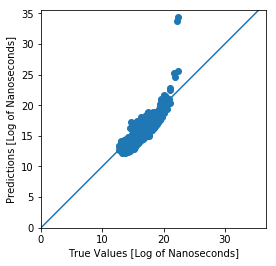

In [198]:
#reg_test_all_predictions[0] = model2.predict(reg_test_params).flatten()

plt.scatter(reg_test_labels, reg_test_all_predictions[0])
plt.xlabel('True Values [Log of Nanoseconds]')
plt.ylabel('Predictions [Log of Nanoseconds]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [199]:
reg_best_predictions = np.argmin(reg_test_all_predictions, 0)
count = 0
for i in range(reg_test_size):
    if reg_best_predictions[i] == reg_test_best_labels[i]:
        count = count + 1
print(count/reg_test_size)

0.6287339971550497


In [200]:
reg_test_all_labels = reg_data[:reg_test_size,parameter_count:]
reg_test_all_labels = np.log(reg_test_all_labels)
reg_test_best_labels = np.argmin(reg_data[:reg_test_size,parameter_count:], 1).astype(int)

In [201]:
# Take the transpose of the predictions matrix (Because we trained the models on their own but now we want a grouping by experiment)
reg_test_all_predictions = np.transpose(reg_test_all_predictions)

In [202]:
# Print prediction, result, and how certain the result is
reg_best = np.argsort(reg_test_all_predictions, 1)
print(reg_best)
print(' Best  Guess1  Guess2   ValueB  ValueA1 ValueG1 ValueA2 ValueG2')
for i in range(reg_test_size):
    print(' ', reg_test_best_labels[i], '\t', reg_best[i][0], '\t', reg_best[i][1], '\t', \
          "{:.4}".format(reg_test_all_labels[i][reg_test_best_labels[i]]), '\t', \
          "{:.4}".format(reg_test_all_labels[i][reg_best[i][0]]), '\t', \
          "{:.4}".format(reg_test_all_predictions[i][reg_best[i][0]]), '\t', \
          "{:.4}".format(reg_test_all_labels[i][reg_best[i][1]]), '\t', \
          "{:.4}".format(reg_test_all_predictions[i][reg_best[i][1]]))

[[20  0 22 ... 10  8 14]
 [20  0 18 ... 11  8  6]
 [ 0 20 22 ...  8 14 15]
 ...
 [12 20  2 ...  8  5  6]
 [20  0 18 ...  8  5  6]
 [20  0  7 ...  8  5  6]]
 Best  Guess1  Guess2   ValueB  ValueA1 ValueG1 ValueA2 ValueG2
  0 	 20 	 0 	 19.08 	 19.12 	 20.07 	 19.08 	 20.16
  20 	 20 	 0 	 15.8 	 15.8 	 16.22 	 16.0 	 17.59
  0 	 0 	 20 	 17.66 	 17.66 	 18.26 	 18.03 	 18.76
  20 	 20 	 0 	 15.63 	 15.63 	 15.51 	 15.69 	 15.71
  20 	 20 	 0 	 15.6 	 15.6 	 16.12 	 15.84 	 17.19
  0 	 0 	 20 	 18.29 	 18.29 	 19.07 	 18.74 	 19.63
  0 	 4 	 17 	 12.58 	 12.86 	 12.72 	 13.66 	 12.79
  20 	 0 	 20 	 15.92 	 16.31 	 15.57 	 15.92 	 16.17
  20 	 0 	 20 	 15.72 	 15.9 	 15.65 	 15.72 	 15.84
  20 	 20 	 0 	 12.29 	 12.29 	 12.08 	 12.61 	 12.25
  7 	 7 	 19 	 13.91 	 13.91 	 13.67 	 14.17 	 13.75
  7 	 2 	 7 	 14.34 	 14.49 	 14.05 	 14.34 	 14.37
  0 	 0 	 20 	 15.34 	 15.34 	 15.43 	 15.52 	 15.63
  0 	 20 	 0 	 13.22 	 13.22 	 13.55 	 13.22 	 13.91
  0 	 0 	 2 	 17.41 	 17.41 	 17.64 	 1

  20 	 22 	 20 	 14.4 	 14.4 	 14.19 	 14.4 	 14.28
  20 	 20 	 0 	 13.4 	 13.4 	 13.24 	 13.62 	 13.46
  20 	 20 	 18 	 12.9 	 12.9 	 13.46 	 13.9 	 13.86
  0 	 20 	 0 	 18.02 	 18.1 	 18.16 	 18.02 	 18.58
  22 	 22 	 20 	 17.46 	 17.46 	 17.26 	 17.81 	 17.63
  20 	 20 	 18 	 12.35 	 12.35 	 12.89 	 13.27 	 13.51
  0 	 20 	 0 	 14.3 	 14.51 	 13.73 	 14.3 	 14.16
  0 	 20 	 22 	 14.22 	 14.74 	 13.07 	 15.03 	 14.13
  7 	 2 	 1 	 14.6 	 14.74 	 13.52 	 14.75 	 14.18
  0 	 0 	 20 	 16.65 	 16.65 	 16.42 	 17.35 	 17.16
  4 	 4 	 3 	 11.37 	 11.37 	 11.75 	 12.0 	 12.47
  20 	 20 	 0 	 15.43 	 15.43 	 15.32 	 15.61 	 15.63
  0 	 20 	 0 	 16.28 	 16.49 	 17.15 	 16.28 	 17.33
  22 	 22 	 2 	 14.75 	 14.75 	 14.84 	 15.76 	 14.87
  20 	 20 	 0 	 14.75 	 14.75 	 14.53 	 15.09 	 14.8
  0 	 20 	 0 	 16.49 	 16.8 	 17.56 	 16.49 	 17.66
  7 	 0 	 7 	 13.08 	 13.7 	 12.77 	 13.08 	 13.14
  22 	 22 	 20 	 17.3 	 17.3 	 17.02 	 17.32 	 17.33
  0 	 0 	 2 	 16.25 	 16.25 	 16.21 	 17.64 	 16.59


  7 	 20 	 0 	 16.05 	 16.21 	 15.7 	 16.2 	 15.94
  22 	 22 	 7 	 15.71 	 15.71 	 15.5 	 15.78 	 15.51
  7 	 20 	 7 	 14.71 	 14.85 	 15.34 	 14.71 	 15.49
  20 	 22 	 20 	 13.94 	 14.01 	 13.9 	 13.94 	 14.04
  7 	 12 	 7 	 14.54 	 14.57 	 15.11 	 14.54 	 15.31
  4 	 4 	 7 	 11.65 	 11.65 	 12.06 	 12.72 	 12.22
  0 	 20 	 0 	 18.38 	 18.45 	 18.4 	 18.38 	 18.84
  0 	 0 	 20 	 15.65 	 15.65 	 15.31 	 16.27 	 15.37
  0 	 0 	 20 	 18.88 	 18.88 	 19.78 	 18.95 	 19.81
  0 	 20 	 0 	 14.66 	 14.75 	 15.23 	 14.66 	 15.45
  20 	 20 	 0 	 14.08 	 14.08 	 12.78 	 14.61 	 13.87
  20 	 20 	 0 	 15.21 	 15.21 	 14.78 	 15.91 	 15.17
  0 	 0 	 20 	 18.11 	 18.11 	 17.82 	 18.65 	 18.8
  0 	 20 	 0 	 13.78 	 13.9 	 14.53 	 13.78 	 14.8
  0 	 20 	 0 	 15.22 	 15.26 	 15.3 	 15.22 	 15.4
  22 	 22 	 4 	 17.51 	 17.51 	 17.74 	 17.87 	 17.76
  20 	 20 	 0 	 18.15 	 18.15 	 18.17 	 18.73 	 18.27
  20 	 0 	 20 	 16.2 	 16.58 	 15.83 	 16.2 	 16.54
  20 	 20 	 0 	 16.16 	 16.16 	 16.42 	 17.06 	 16.

  20 	 20 	 18 	 16.54 	 16.54 	 16.99 	 17.8 	 18.18
  20 	 20 	 0 	 15.8 	 15.8 	 16.49 	 15.96 	 17.42
  7 	 20 	 2 	 15.15 	 15.25 	 15.7 	 15.16 	 15.92
  7 	 7 	 20 	 14.25 	 14.25 	 14.79 	 14.41 	 14.82
  0 	 0 	 20 	 18.49 	 18.49 	 18.86 	 19.38 	 19.11
  0 	 0 	 22 	 17.22 	 17.22 	 17.87 	 17.83 	 18.49
  0 	 0 	 20 	 17.86 	 17.86 	 17.79 	 18.41 	 18.22
  22 	 22 	 11 	 16.44 	 16.44 	 16.48 	 16.74 	 16.55
  20 	 20 	 0 	 15.22 	 15.22 	 15.12 	 15.7 	 16.03
  0 	 20 	 0 	 13.8 	 13.81 	 13.8 	 13.8 	 14.16
  0 	 0 	 20 	 17.72 	 17.72 	 17.79 	 18.01 	 18.2
  20 	 0 	 20 	 17.09 	 19.14 	 17.15 	 17.09 	 17.33
  0 	 20 	 0 	 13.4 	 13.7 	 14.25 	 13.4 	 14.54
  20 	 20 	 0 	 14.37 	 14.37 	 14.3 	 14.51 	 14.78
  20 	 20 	 7 	 15.9 	 15.9 	 16.28 	 17.02 	 17.2
  20 	 20 	 0 	 13.1 	 13.1 	 12.88 	 13.46 	 14.22
  22 	 20 	 22 	 15.57 	 15.59 	 14.96 	 15.57 	 15.18
  20 	 20 	 0 	 15.06 	 15.06 	 15.04 	 15.19 	 15.1
  20 	 20 	 18 	 15.56 	 15.56 	 15.67 	 16.72 	 16.

In [203]:
# Print general statistics about in how many guesses the AI would be correct
reg_correct = np.zeros(reg_best.shape[1])
reg_most_occuring = np.sort(np.bincount(reg_test_best_labels))[::-1]
for i in range(reg_test_size):
    for j in range(reg_correct.size):
        if reg_best[i][j] == reg_test_best_labels[i]:
            reg_correct[j] = reg_correct[j] + 1
            break
np.set_printoptions(precision=3)
print('The count of guesses until correct choice:', reg_correct.astype(int))
print('Cumilative chance that the choice was correct by:', \
      np.apply_along_axis(lambda x: x / reg_test_size, 0, np.cumsum(reg_correct))[0:5])
print('The count of most occuring tests:', reg_most_occuring)
print('Cumilative chance that the choice was correct by:', \
      np.apply_along_axis(lambda x: x / reg_test_size, 0, np.cumsum(reg_most_occuring))[0:5])

The count of guesses until correct choice: [442 152  45  15  12  11   3   7   4   1   1   3   3   1   1   0   1   0
   0   0   0   0   1]
Cumilative chance that the choice was correct by: [0.629 0.845 0.909 0.93  0.947]
The count of most occuring tests: [324 232  42  35  29  28   6   4   3   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
Cumilative chance that the choice was correct by: [0.461 0.791 0.851 0.9   0.942]


In [ ]:
#print(reg_train_params)
#print(reg_train_labels)
#print(np.std(reg_train_params, 0))
#print(np.mean(reg_train_params, 0))
#model2.summary()